# [Base de datos de Fútbol Europeo](https://www.kaggle.com/datasets/hugomathien/soccer)

In [1]:
import pandas as pd
import sqlite3

In [284]:
!pwd

/app/my_data/students_diplomado_data_science_fmat/class_of_2024/maria_matus


- Chequemos el nombre de las tablas que tiene la base de datos

In [2]:
#con = sqlite3.connect("../data/raw/database.sqlite")
database = "/app/my_data/canastabasica_datatools/data/raw/database.sqlite"
conn = sqlite3.connect(database)

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)

conn.close()
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


- Creemos un pandas `dataframe` por cada tabla de la base de datos
- PILAS con que usaremos `for`, `if`, `dict` & `list comprehension`

In [6]:
conn = sqlite3.connect(database)


dict_tables_db = {}
lista_no_tablas = ['sqlite_sequence']
for tabletmp in tables['name']:
    if tabletmp not in lista_no_tablas:
        query = "SELECT * from %s"%tabletmp
        print(query)
        dict_tables_db[tabletmp] = pd.read_sql_query(query, conn)


conn.close()


[display(x) for x in dict_tables_db.values()]

SELECT * from Player_Attributes
SELECT * from Player
SELECT * from Match
SELECT * from League
SELECT * from Country
SELECT * from Team
SELECT * from Team_Attributes


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


[None, None, None, None, None, None, None]

- Qué se les ocurre que consultemos en la base?
- Qué pregunta les gustaría contestar?

In [7]:
for key,tabletbp in dict_tables_db.items():
    print(key)

Player_Attributes
Player
Match
League
Country
Team
Team_Attributes


## Un primer vistazo a cada tabla

In [8]:
for key,tabletbp in dict_tables_db.items():
    print(key)
    print(tabletbp.shape)
    display(tabletbp.describe())

Player_Attributes
(183978, 42)


,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


Player
(11060, 7)


,id,player_api_id,player_fifa_api_id,height,weight
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,5537.511392,156582.427215,165664.910488,181.867445,168.380289
std,3197.692647,160713.700624,58649.928360,6.369201,14.990217
min,1.000000,2625.000000,2.000000,157.480000,117.000000
25%,2767.750000,35555.500000,151889.500000,177.800000,159.000000
50%,5536.500000,96619.500000,184671.000000,182.880000,168.000000
75%,8306.250000,212470.500000,203883.250000,185.420000,179.000000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000


Match
(25979, 115)


,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


League
(11, 3)


,id,country_id
count,11.000000,11.000000
mean,12452.090909,12452.090909
std,8215.308472,8215.308472
min,1.000000,1.000000
25%,6289.000000,6289.000000
50%,13274.000000,13274.000000
75%,18668.000000,18668.000000
max,24558.000000,24558.000000


Country
(11, 2)


,id
count,11.000000
mean,12452.090909
std,8215.308472
min,1.000000
25%,6289.000000
50%,13274.000000
75%,18668.000000
max,24558.000000


Team
(299, 5)


,id,team_api_id,team_fifa_api_id
count,299.000000,299.000000,288.000000
mean,23735.301003,12340.521739,21534.305556
std,15167.914719,25940.411135,42456.439408
min,1.000000,1601.000000,1.000000
25%,9552.500000,8349.000000,178.750000
50%,22805.000000,8655.000000,673.500000
75%,36250.500000,9886.500000,1910.750000
max,51606.000000,274581.000000,112513.000000


Team_Attributes
(1458, 25)


,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


In [9]:
#conn = sqlite3.connect(database)

df_player_atr = dict_tables_db['Player_Attributes']#pd.read_sql_query("SELECT * from Player_Attributes", conn)
df_player = dict_tables_db['Player']#pd.read_sql_query("SELECT * from Player", conn)
df_match = dict_tables_db['Match']#pd.read_sql_query("SELECT * from Match", conn)
df_league = dict_tables_db['League']#pd.read_sql_query("SELECT * from League", conn)
df_country = dict_tables_db['Country']#pd.read_sql_query("SELECT * from Country", conn)
df_team = dict_tables_db['Team']#pd.read_sql_query("SELECT * from Team", conn)
df_team_atr = dict_tables_db['Team_Attributes']#pd.read_sql_query("SELECT * from Team_Attributes", conn)

# Verify that result of SQL query is stored in the dataframe
#print(df_country.head())

#conn.close()

## Checando nombres de las columnas de las tablas

- Ésta es una base de datos que está "centrada" en la tabla `match`
- Qué tienen en común ésa tabla con las demás?

In [10]:
df_player_atr.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [15]:
df_player.columns

Index(['id', 'player_api_id', 'player_name', 'player_fifa_api_id', 'birthday',
       'height', 'weight'],
      dtype='object')

In [19]:
df_team_atr.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

In [24]:
df_team.columns

Index(['id', 'team_api_id', 'team_fifa_api_id', 'team_long_name',
       'team_short_name'],
      dtype='object')

In [25]:
df_player_atr.groupby('preferred_foot').agg({
    'overall_rating':'mean',
    'penalties':'mean'
})
#[['preferred_foot','positioning']]

,overall_rating,penalties
preferred_foot,,
left,68.626182,55.465786
right,68.591558,54.854735


In [26]:
df_player_atr.dtypes

id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision  

In [27]:
df_player_atr[['preferred_foot',
               'overall_rating',
       'potential', #'attacking_work_rate','defensive_work_rate', 
               'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']]\
.groupby('preferred_foot').mean()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
preferred_foot,,,,,,,,,,,,,,,,,,,,,
left,68.626182,73.506673,60.391054,49.533767,57.430555,64.291351,49.859835,61.805513,57.105412,53.283929,...,58.930493,55.465786,50.342298,53.816310,51.741763,12.461986,13.865826,19.352514,13.959024,14.130843
right,68.591558,73.445383,53.372606,50.046254,57.212847,61.827988,49.341796,58.325037,51.626237,48.119530,...,57.531569,54.854735,45.618421,49.231372,46.791264,15.429127,16.773924,21.530291,16.834498,17.188210


In [28]:
import numpy as np
list_atrr = [
               'overall_rating',
       'potential', #'attacking_work_rate','defensive_work_rate', 
               'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']
dict_aggs = {}
for atr in list_atrr:
    dict_aggs[atr] = ['mean','min','max',np.median,np.std,np.var]


gb_metrics_by_atr = df_player_atr[['preferred_foot']+list_atrr]\
                    .groupby('preferred_foot')\
                    .agg(dict_aggs)
gb_metrics_by_atr

overall_rating                                          \
                         mean   min   max median       std        var   
preferred_foot                                                          
left                68.626182  35.0  94.0   69.0  6.680060  44.623201   
right               68.591558  33.0  93.0   69.0  7.153945  51.178935   

                potential                     ... gk_positioning         \
                     mean   min   max median  ...            max median   
preferred_foot                                ...                         
left            73.506673  45.0  97.0   74.0  ...           94.0   11.0   
right           73.445383  39.0  95.0   74.0  ...           96.0   11.0   

                                      gk_reflexes                    \
                      std         var        mean  min   max median   
preferred_foot                                                        
left            12.420478  154.268262   14.130843  1.0  96.0   11.0   
right           17.060868  291.073217   17.188210  1.0  94.0   11.0   

                                       
                      std         var  
preferred_foot                         
left            13.159664  173.176768  
right           18.251533  333.118441  

[2 rows x 210 columns]

from ydata_profiling import ProfileReport

profile = ProfileReport(df_player_atr[list_atrr], title="Profiling Report")
#profile.to_notebook_iframe()

In [31]:
[x for x in df_match.columns if x in df_player_atr.columns]

['id', 'date']

In [32]:
[x for x in df_match.columns if x in df_team_atr.columns]

['id', 'date']

In [33]:
[x for x in df_player_atr.columns if x in df_player.columns]

['id', 'player_fifa_api_id', 'player_api_id']

In [34]:
[x for x in df_team_atr.columns if x in df_team.columns]

['id', 'team_fifa_api_id', 'team_api_id']

In [35]:
[x for x in df_team.columns if x in df_country.columns]

['id']

In [36]:
[x for x in df_team.columns if x in df_player.columns]

['id']

In [37]:
[x for x in df_country.columns if x in df_league.columns]

['id', 'name']

## Exploratory Data Analysis

### `merge` / `join`
- Fijémonos como, de entrada, a través de esa única tabla NO podemos saber en lenguaje "mortal", cuáles son los nombres de los equipos que se enfrentaron...
- Podríamos empezar, entonces, pegando el nombre de los equipos a cada partido
- Para ello, recurriremos a uno de las funciones que tiene pandas *"inspiradas"* en **$SQL$**: `merge` & `join`

- Pensémoslo como el *"pegado"* de dos tablas a la vez por alguna o algunas columna(s) de ambas tablas
    - Puede ser considerando como base la primera columna (a la que llamaremos la columna de la izquierda - `left`) y pegando lo que sea que encuentre de la segunda columna (derecha) y lo que no encuentre implanta un `NaN`: `join(how='left') o merge(how='left)'`
    - O que la base sea la de la derecha `join(how='rigth') o merge(how='rigth')'`
    - o que nos quedamos únicamente con lo que hay en ambas tablas  `join(how='inner') o merge(how='inner')'`
 
- **MUY IMPORTANTE:** Considerar que se necesita de una o unas columnas **"llaves"** que son las que se utilizan para encontrar las coincidencias entre las tablas que se están pegando en el parámetro `on='key1'`

In [20]:
[x for x in df_match.columns if x in df_team.columns]

['id']

In [21]:
[x for x in df_match.columns if x not in df_team.columns]

['country_id',
 'league_id',
 'season',
 'stage',
 'date',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_player_Y11',


- Volvamos a revisar los nombres de las columnas pero filtrando por aquellas que tengan `id` en el nombre pensando en opciones de columnas que pudieran servir como *"llaves"* para cruzar las tablas

In [22]:
[x for x in df_match.columns if x not in df_team.columns and 'id' in x]

['country_id',
 'league_id',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id']

- De la tabla `df_match` nos interesarían `home_team_api_id` & `away_team_api_id` para pegar la info de los equipos (`df_teams`)

In [23]:
df_team

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


In [39]:
df_match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Para traer los nombres de los equipos de `df_teams`, se necesitan las columnas `team_api_id` (como *llave*) y `team_long_name` para tener el nombre de los equipos en la tabla

In [24]:
df_match[['date','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal']].merge(
    df_team[['team_api_id','team_long_name']],
    how='right',left_on='home_team_api_id', right_on = 'team_api_id'
)

,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,team_api_id,team_long_name
0,2008-08-17 00:00:00,9987,9993,1,1,9987,KRC Genk
1,2008-11-15 00:00:00,9987,9999,1,1,9987,KRC Genk
2,2008-11-29 00:00:00,9987,9984,3,2,9987,KRC Genk
3,2008-12-13 00:00:00,9987,9986,1,0,9987,KRC Genk
4,2009-01-24 00:00:00,9987,9998,2,0,9987,KRC Genk
...,...,...,...,...,...,...,...
25974,2016-05-16 00:00:00,7896,10192,1,3,7896,Lugano
25975,2016-05-25 00:00:00,7896,10190,3,0,7896,Lugano
25976,2015-08-22 00:00:00,7896,9931,1,3,7896,Lugano
25977,2015-08-29 00:00:00,7896,10199,0,1,7896,Lugano


- Pero el nombre del equipo es del equipo local o del visitante?
- y luego? Cómo lo diferenciamos?
- Se acuerdan del método `rename` de las `serie`s? También lo tienen los `dataframe`s
- En el código estamos pegando por `home_team_api_id`, así que renombremos en función de eso:

In [40]:
df_team[['team_api_id','team_long_name']].rename(
    columns=
    {
        'team_long_name':'home_team_name'
    }
    )

,team_api_id,home_team_name
0,9987,KRC Genk
1,9993,Beerschot AC
2,10000,SV Zulte-Waregem
3,9994,Sporting Lokeren
4,9984,KSV Cercle Brugge
...,...,...
294,10190,FC St. Gallen
295,10191,FC Thun
296,9777,Servette FC
297,7730,FC Lausanne-Sports


In [41]:
len(df_match)

25979

In [42]:
df_match[['date','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal']].merge(
    df_team[['team_api_id','team_long_name']].rename(
        columns=
        {
            'team_long_name':'home_team_name'
        }
        ), how='right',left_on='home_team_api_id', right_on = 'team_api_id'
)

,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,team_api_id,home_team_name
0,2008-08-17 00:00:00,9987,9993,1,1,9987,KRC Genk
1,2008-11-15 00:00:00,9987,9999,1,1,9987,KRC Genk
2,2008-11-29 00:00:00,9987,9984,3,2,9987,KRC Genk
3,2008-12-13 00:00:00,9987,9986,1,0,9987,KRC Genk
4,2009-01-24 00:00:00,9987,9998,2,0,9987,KRC Genk
...,...,...,...,...,...,...,...
25974,2016-05-16 00:00:00,7896,10192,1,3,7896,Lugano
25975,2016-05-25 00:00:00,7896,10190,3,0,7896,Lugano
25976,2015-08-22 00:00:00,7896,9931,1,3,7896,Lugano
25977,2015-08-29 00:00:00,7896,10199,0,1,7896,Lugano


- Y podemos pegar la tabla OTRA VEZ, pero ahora para el equipo visitante

In [43]:
df_match_teams = df_match[
    [
        'date','country_id','league_id','season','match_api_id','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal',
        #'possession'#'away_player_1'
    ]
].merge(
    df_team[['team_api_id','team_long_name']].rename(
        columns=
        {
            'team_long_name':'home_team_name',
            'team_api_id':'home_team_api_id'
        }
        ), how='right',left_on='home_team_api_id', right_on = 'home_team_api_id'
).merge(
    df_team[['team_api_id','team_long_name']].rename(
        columns=
        {
            'team_long_name':'away_team_name',
            'team_api_id':'away_team_api_id'
        }
        ), how='right',left_on='away_team_api_id', right_on = 'away_team_api_id'
)
df_match_teams

,date,country_id,league_id,season,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_name,away_team_name
0,2009-01-18 00:00:00,1,1,2008/2009,492769,9993,9987,4,1,Beerschot AC,KRC Genk
1,2009-12-26 00:00:00,1,1,2009/2010,665651,9993,9987,1,0,Beerschot AC,KRC Genk
2,2010-12-05 00:00:00,1,1,2010/2011,838694,9993,9987,0,1,Beerschot AC,KRC Genk
3,2011-12-02 00:00:00,1,1,2011/2012,1032814,9993,9987,2,0,Beerschot AC,KRC Genk
4,2013-02-09 00:00:00,1,1,2012/2013,1224185,9993,9987,0,2,Beerschot AC,KRC Genk
...,...,...,...,...,...,...,...,...,...,...,...
25974,2016-05-11 00:00:00,24558,24558,2015/2016,1992215,10243,7896,0,4,FC Zürich,Lugano
25975,2015-07-19 00:00:00,24558,24558,2015/2016,1992055,10190,7896,2,0,FC St. Gallen,Lugano
25976,2016-02-28 00:00:00,24558,24558,2015/2016,1992157,10190,7896,3,3,FC St. Gallen,Lugano
25977,2015-10-25 00:00:00,24558,24558,2015/2016,1992114,10191,7896,2,1,FC Thun,Lugano


### Primeras ideas para Feature Engineering

- Antes de hacer un modelo, es imprescindible saber qué es lo que queremos predecir, para, a partir de allí, dirigir el análisis e ir creando features que hagan sentido.
- **Propuesta: Modelo predictivo de si, en un partido, un equipo generá puntos (es decir que no pierda = (que gane o que empate))**

<br>


- Se acuerdan del `np.where`: `serie.where(condicion,valor_si_true,valor_si_false)`?
    - Si se cumple la condición se imputa el primer valor (2do argumento - `valor_si_true`)
    - Si no se cumple la condición se imputa el segundo valor (3er argumento - `valor_si_false`)
- Al mismo tiempo podemos constrastarlo con el `.where` de las `series` que funciona ligeramente diferente: `serie.where(condicion,valor_si_false)`
    - si se cumple la condición, se mantienen los valores originales (`serie`)
    - si no se cumple la condición se imputa el valor especificado (`valor_si false`)
- Recuerdan el uso de diccionarios? También los podemos aplicar muy fácil y eficientemente sobre una `serie` a través del método `replace`

In [45]:
import numpy as np
np.where(df_match_teams.home_team_goal>df_match_teams.away_team_goal,'Local',np.where(df_match_teams.home_team_goal<df_match_teams.away_team_goal,'Visitante','Empate'))

array(['Local', 'Local', 'Visitante', ..., 'Empate', 'Local', 'Local'],
      dtype='<U9')

In [46]:
dict_categorias_num_resultado = {
    -1:'pierde',
    1:'gana',
    0:'empata'
}

dict_categorias_ganador_local = {
    'Local':1,
    'Visitante':-1,
    'Empate':0
}

dict_categorias_puntos = {
    'gana':3,
    'pierde':0,
    'empata':1
}


- Platicamos qué genera cada feature?

In [47]:
df_match_teams['ganador'] = np.where(
    df_match_teams.home_team_goal>df_match_teams.away_team_goal,'Local',
    np.where(
        df_match_teams.home_team_goal<df_match_teams.away_team_goal,'Visitante',
        'Empate'
    )
)

df_match_teams['dif_goles_local'] = df_match_teams.home_team_goal-df_match_teams.away_team_goal

df_match_teams['dif_goles_visitante'] = -1*df_match_teams['dif_goles_local']

df_match_teams['resultado_local_num'] = df_match_teams.ganador.replace(
    dict_categorias_ganador_local
)
df_match_teams['resultado_visitante_num'] = -1*df_match_teams['resultado_local_num']
df_match_teams['resultado_local'] = df_match_teams.resultado_local_num.replace(
    dict_categorias_num_resultado
)
df_match_teams['resultado_visitante'] = df_match_teams.resultado_visitante_num.replace(
    dict_categorias_num_resultado
)
df_match_teams['puntos_local'] = df_match_teams.resultado_local.replace(
    dict_categorias_puntos
)
df_match_teams['puntos_visitante'] = df_match_teams.resultado_visitante.replace(
    dict_categorias_puntos
)

df_match_teams

,date,country_id,league_id,season,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_name,away_team_name,ganador,dif_goles_local,dif_goles_visitante,resultado_local_num,resultado_visitante_num,resultado_local,resultado_visitante,puntos_local,puntos_visitante
0,2009-01-18 00:00:00,1,1,2008/2009,492769,9993,9987,4,1,Beerschot AC,KRC Genk,Local,3,-3,1,-1,gana,pierde,3,0
1,2009-12-26 00:00:00,1,1,2009/2010,665651,9993,9987,1,0,Beerschot AC,KRC Genk,Local,1,-1,1,-1,gana,pierde,3,0
2,2010-12-05 00:00:00,1,1,2010/2011,838694,9993,9987,0,1,Beerschot AC,KRC Genk,Visitante,-1,1,-1,1,pierde,gana,0,3
3,2011-12-02 00:00:00,1,1,2011/2012,1032814,9993,9987,2,0,Beerschot AC,KRC Genk,Local,2,-2,1,-1,gana,pierde,3,0
4,2013-02-09 00:00:00,1,1,2012/2013,1224185,9993,9987,0,2,Beerschot AC,KRC Genk,Visitante,-2,2,-1,1,pierde,gana,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,2016-05-11 00:00:00,24558,24558,2015/2016,1992215,10243,7896,0,4,FC Zürich,Lugano,Visitante,-4,4,-1,1,pierde,gana,0,3
25975,2015-07-19 00:00:00,24558,24558,2015/2016,1992055,10190,7896,2,0,FC St. Gallen,Lugano,Local,2,-2,1,-1,gana,pierde,3,0
25976,2016-02-28 00:00:00,24558,24558,2015/2016,1992157,10190,7896,3,3,FC St. Gallen,Lugano,Empate,0,0,0,0,empata,empata,1,1
25977,2015-10-25 00:00:00,24558,24558,2015/2016,1992114,10191,7896,2,1,FC Thun,Lugano,Local,1,-1,1,-1,gana,pierde,3,0


In [32]:


df_match_teams['puntos_visitante'] = df_match_teams.resultado_visitante.replace(
    dict_categorias_puntos
)

df_match_teams

,date,country_id,league_id,season,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_name,away_team_name,ganador,dif_goles_local,dif_goles_visitante,resultado_local_num,resultado_visitante_num,resultado_local,resultado_visitante,puntos_local,puntos_visitante
0,2009-01-18 00:00:00,1,1,2008/2009,492769,9993,9987,4,1,Beerschot AC,KRC Genk,Local,3,-3,1,-1,gana,pierde,3,0
1,2009-12-26 00:00:00,1,1,2009/2010,665651,9993,9987,1,0,Beerschot AC,KRC Genk,Local,1,-1,1,-1,gana,pierde,3,0
2,2010-12-05 00:00:00,1,1,2010/2011,838694,9993,9987,0,1,Beerschot AC,KRC Genk,Visitante,-1,1,-1,1,pierde,gana,0,3
3,2011-12-02 00:00:00,1,1,2011/2012,1032814,9993,9987,2,0,Beerschot AC,KRC Genk,Local,2,-2,1,-1,gana,pierde,3,0
4,2013-02-09 00:00:00,1,1,2012/2013,1224185,9993,9987,0,2,Beerschot AC,KRC Genk,Visitante,-2,2,-1,1,pierde,gana,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,2016-05-11 00:00:00,24558,24558,2015/2016,1992215,10243,7896,0,4,FC Zürich,Lugano,Visitante,-4,4,-1,1,pierde,gana,0,3
25975,2015-07-19 00:00:00,24558,24558,2015/2016,1992055,10190,7896,2,0,FC St. Gallen,Lugano,Local,2,-2,1,-1,gana,pierde,3,0
25976,2016-02-28 00:00:00,24558,24558,2015/2016,1992157,10190,7896,3,3,FC St. Gallen,Lugano,Empate,0,0,0,0,empata,empata,1,1
25977,2015-10-25 00:00:00,24558,24558,2015/2016,1992114,10191,7896,2,1,FC Thun,Lugano,Local,1,-1,1,-1,gana,pierde,3,0


In [50]:
df_match_teams.resultado_visitante.replace(
    dict_categorias_puntos
)

0        0
1        0
2        3
3        0
4        3
        ..
25974    3
25975    0
25976    1
25977    0
25978    0
Name: resultado_visitante, Length: 25979, dtype: int64

In [49]:
df_match_teams.resultado_visitante

0        pierde
1        pierde
2          gana
3        pierde
4          gana
          ...  
25974      gana
25975    pierde
25976    empata
25977    pierde
25978    pierde
Name: resultado_visitante, Length: 25979, dtype: object

#### **Variable Target!!!**
- **Construcción** de dos opciones de **variables target**

- Se acuerdan de la función `assing()` (emulando a `mutate` de $dplyr$)???
- Podemos construir todo desde el merge en un solo paso sin estar sobreescribiendo el mismo dataframe una y otra vez:

In [51]:
df_match_teams['suma_puntos_local'] = df_match_teams['puntos_local'].where(df_match_teams['puntos_local']==0,1) ## POSIBLE VARIABLE TARGET
df_match_teams['suma_puntos_visitante'] = df_match_teams['puntos_visitante'].where(df_match_teams['puntos_visitante']==0,1) ## POSIBLE VARIABLE TARGET
df_match_teams

,date,country_id,league_id,season,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_name,...,dif_goles_local,dif_goles_visitante,resultado_local_num,resultado_visitante_num,resultado_local,resultado_visitante,puntos_local,puntos_visitante,suma_puntos_local,suma_puntos_visitante
0,2009-01-18 00:00:00,1,1,2008/2009,492769,9993,9987,4,1,Beerschot AC,...,3,-3,1,-1,gana,pierde,3,0,1,0
1,2009-12-26 00:00:00,1,1,2009/2010,665651,9993,9987,1,0,Beerschot AC,...,1,-1,1,-1,gana,pierde,3,0,1,0
2,2010-12-05 00:00:00,1,1,2010/2011,838694,9993,9987,0,1,Beerschot AC,...,-1,1,-1,1,pierde,gana,0,3,0,1
3,2011-12-02 00:00:00,1,1,2011/2012,1032814,9993,9987,2,0,Beerschot AC,...,2,-2,1,-1,gana,pierde,3,0,1,0
4,2013-02-09 00:00:00,1,1,2012/2013,1224185,9993,9987,0,2,Beerschot AC,...,-2,2,-1,1,pierde,gana,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,2016-05-11 00:00:00,24558,24558,2015/2016,1992215,10243,7896,0,4,FC Zürich,...,-4,4,-1,1,pierde,gana,0,3,0,1
25975,2015-07-19 00:00:00,24558,24558,2015/2016,1992055,10190,7896,2,0,FC St. Gallen,...,2,-2,1,-1,gana,pierde,3,0,1,0
25976,2016-02-28 00:00:00,24558,24558,2015/2016,1992157,10190,7896,3,3,FC St. Gallen,...,0,0,0,0,empata,empata,1,1,1,1
25977,2015-10-25 00:00:00,24558,24558,2015/2016,1992114,10191,7896,2,1,FC Thun,...,1,-1,1,-1,gana,pierde,3,0,1,0


In [52]:
df_match_teams = df_match[
    [
        'date','country_id','league_id','season','match_api_id','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal',
        #'possession'#'away_player_1'
    ]
].merge(
    df_team[['team_api_id','team_long_name']].rename(
        columns=
        {
            'team_long_name':'home_team_name',
            'team_api_id':'home_team_api_id'
        }
        ), how='right',left_on='home_team_api_id', right_on = 'home_team_api_id'
).merge(
    df_team[['team_api_id','team_long_name']].rename(
        columns=
        {
            'team_long_name':'away_team_name',
            'team_api_id':'away_team_api_id'
        }
        ), how='right',left_on='away_team_api_id', right_on = 'away_team_api_id'
).assign(
    
    ganador = lambda x: np.where(
        x['home_team_goal']>x['away_team_goal'],'Local',
        np.where(
            x['home_team_goal']<x['away_team_goal'],'Visitante',
            'Empate'
        )
    ),
    
    dif_goles_local = lambda x:x['home_team_goal']-x['away_team_goal'],
    
    dif_goles_visitante = lambda x:-1*x['dif_goles_local'],
    
    resultado_local_num = lambda x: x['ganador'].replace(
        dict_categorias_ganador_local
    ),
    
    resultado_visitante_num = lambda x: -1*x['resultado_local_num'],
    
    resultado_local = lambda x: x['resultado_local_num'].replace(dict_categorias_num_resultado),
    
    resultado_visitante = lambda x: x['resultado_visitante_num'].replace(dict_categorias_num_resultado),
    
    puntos_local = lambda x: x['resultado_local'].replace(dict_categorias_puntos),
    
    puntos_visitante = lambda x: x['resultado_visitante'].replace(dict_categorias_puntos),
    
    suma_puntos_local = lambda x: x['puntos_local'].where(x['puntos_local']==0,1),
    
    suma_puntos_visitante = lambda x: x['puntos_visitante'].where(x['puntos_visitante']==0,1)
    
)



df_match_teams

,date,country_id,league_id,season,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_name,...,dif_goles_local,dif_goles_visitante,resultado_local_num,resultado_visitante_num,resultado_local,resultado_visitante,puntos_local,puntos_visitante,suma_puntos_local,suma_puntos_visitante
0,2009-01-18 00:00:00,1,1,2008/2009,492769,9993,9987,4,1,Beerschot AC,...,3,-3,1,-1,gana,pierde,3,0,1,0
1,2009-12-26 00:00:00,1,1,2009/2010,665651,9993,9987,1,0,Beerschot AC,...,1,-1,1,-1,gana,pierde,3,0,1,0
2,2010-12-05 00:00:00,1,1,2010/2011,838694,9993,9987,0,1,Beerschot AC,...,-1,1,-1,1,pierde,gana,0,3,0,1
3,2011-12-02 00:00:00,1,1,2011/2012,1032814,9993,9987,2,0,Beerschot AC,...,2,-2,1,-1,gana,pierde,3,0,1,0
4,2013-02-09 00:00:00,1,1,2012/2013,1224185,9993,9987,0,2,Beerschot AC,...,-2,2,-1,1,pierde,gana,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,2016-05-11 00:00:00,24558,24558,2015/2016,1992215,10243,7896,0,4,FC Zürich,...,-4,4,-1,1,pierde,gana,0,3,0,1
25975,2015-07-19 00:00:00,24558,24558,2015/2016,1992055,10190,7896,2,0,FC St. Gallen,...,2,-2,1,-1,gana,pierde,3,0,1,0
25976,2016-02-28 00:00:00,24558,24558,2015/2016,1992157,10190,7896,3,3,FC St. Gallen,...,0,0,0,0,empata,empata,1,1,1,1
25977,2015-10-25 00:00:00,24558,24558,2015/2016,1992114,10191,7896,2,1,FC Thun,...,1,-1,1,-1,gana,pierde,3,0,1,0


### Más *exploratory* con `groupby`

In [54]:
df_match_teams.groupby('ganador').agg(
    {'match_api_id':'count'}
)

,match_api_id
ganador,
Empate,6596
Local,11917
Visitante,7466


In [55]:
df_match_teams.groupby(['season','ganador']).agg(
    {'match_api_id':'count'}
)

match_api_id
season    ganador                
2008/2009 Empate              831
          Local              1566
          Visitante           929
2009/2010 Empate              814
          Local              1532
          Visitante           884
2010/2011 Empate              839
          Local              1520
          Visitante           901
2011/2012 Empate              818
          Local              1498
          Visitante           904
2012/2013 Empate              853
          Local              1444
          Visitante           963
2013/2014 Empate              736
          Local              1404
          Visitante           892
2014/2015 Empate              850
          Local              1494
          Visitante           981
2015/2016 Empate              855
          Local              1459
          Visitante          1012

In [56]:
df_match_teams.groupby(['season']).agg(
    {
        'suma_puntos_local':['sum','mean'],
        'suma_puntos_visitante':['sum','mean']
    }
)

suma_puntos_local           suma_puntos_visitante          
                        sum      mean                   sum      mean
season                                                               
2008/2009              2397  0.720686                  1760  0.529164
2009/2010              2346  0.726316                  1698  0.525697
2010/2011              2359  0.723620                  1740  0.533742
2011/2012              2316  0.719255                  1722  0.534783
2012/2013              2297  0.704601                  1816  0.557055
2013/2014              2140  0.705805                  1628  0.536939
2014/2015              2344  0.704962                  1831  0.550677
2015/2016              2314  0.695731                  1867  0.561335

- A veces sirve verlo en alguna gráfica...

<Axes: xlabel='season'>

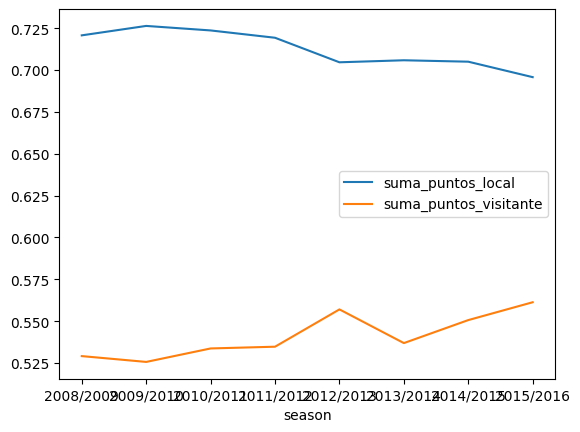

In [57]:
df_match_teams.groupby(['season']).agg(
    {
        'suma_puntos_local':'mean',
        'suma_puntos_visitante':'mean'
    }
).plot()

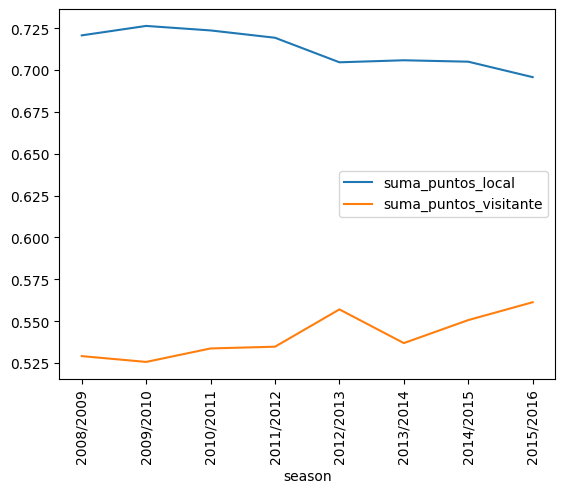

In [58]:
import matplotlib.pyplot as plt
df_match_teams.groupby(['season']).agg(
    {
        'suma_puntos_local':'mean',
        'suma_puntos_visitante':'mean'
    }
).plot()
plt.xticks(rotation='vertical')
plt.show()

- y será que cambie de país en país o entre ligas
- Mmmm igual y habría que ir a buscar esa info a otras tablas, no?

In [59]:
df_country.columns

Index(['id', 'name'], dtype='object')

In [60]:
df_league.columns

Index(['id', 'country_id', 'name'], dtype='object')

In [61]:
[x for x in df_match.columns if 'id' in x]

['id',
 'country_id',
 'league_id',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id']

In [66]:
df_match.league_id.unique()

array([    1,  1729,  4769,  7809, 10257, 13274, 15722, 17642, 19694,
       21518, 24558])

In [65]:
df_league.id.unique()

array([    1,  1729,  4769,  7809, 10257, 13274, 15722, 17642, 19694,
       21518, 24558])

In [67]:
df_league.name.unique()

array(['Belgium Jupiler League', 'England Premier League',
       'France Ligue 1', 'Germany 1. Bundesliga', 'Italy Serie A',
       'Netherlands Eredivisie', 'Poland Ekstraklasa',
       'Portugal Liga ZON Sagres', 'Scotland Premier League',
       'Spain LIGA BBVA', 'Switzerland Super League'], dtype=object)

- Ahora lo podemos hacer, para aprender, a través de la función `join`
- Una de las diferencias es que las columnas *"llaves"* deben llamarse igual y
- en la tabla de la derecha debe tener esas *"llaves"* como índices del dataframe
- Por lo tanto, podemos mostrar cómo haremos el cambio de nombre y el *seteo* del índice de las tablas de la derecha antes de hacer el `join`, ya que tienen nombre diferente con la tabla de la izquierda.
    - esto lo haremos con el método `rename(columns={})`

#### `df_country`

In [70]:
df_country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [71]:
df_country.rename(columns={
    'id' : 'id_country'
})

,id_country,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


- *seteando* el índice a`id_country`

In [72]:
df_country.rename(columns={
        'id' : 'id_country'
    }).set_index('id_country')

,name
id_country,
1,Belgium
1729,England
4769,France
7809,Germany
10257,Italy
13274,Netherlands
15722,Poland
17642,Portugal
19694,Scotland


#### `df_league`

In [73]:
df_league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [74]:
df_league.rename(columns={
    'id':'league_id'
})

,league_id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


seteando el índice a `league_id`

In [75]:
df_league.rename(columns={
    'id':'league_id'
}).set_index('league_id')

,country_id,name
league_id,,
1,1,Belgium Jupiler League
1729,1729,England Premier League
4769,4769,France Ligue 1
7809,7809,Germany 1. Bundesliga
10257,10257,Italy Serie A
13274,13274,Netherlands Eredivisie
15722,15722,Poland Ekstraklasa
17642,17642,Portugal Liga ZON Sagres
19694,19694,Scotland Premier League


#### df_league `join` df_country

In [76]:
df_league.rename(columns={
    'id':'league_id'
}).join(
    df_country.rename(columns={
        'id' : 'id_country'
    }).set_index('id_country')
)

ValueError: columns overlap but no suffix specified: Index(['name'], dtype='object')

 - El error anterior nos avisa de que hay columnas que se traslapan, es decir, que se llaman igual.
 - Conviene cambiar también los nombres de esas columnas para diferenciar entre el nombre de la liga y el nombre del país
 - El parámetro `on`, sirve para esfecificar bajo cuál columna o columnas hacer el *"pegado"*

In [77]:
df_league.rename(columns={
    'id':'league_id',
    'name':'name_league'
}).join(
    df_country.rename(columns={
        'id' : 'country_id',
        'name':'name_country'
    }).set_index('country_id'), on ='country_id', how='left'
)

,league_id,country_id,name_league,name_country
0,1,1,Belgium Jupiler League,Belgium
1,1729,1729,England Premier League,England
2,4769,4769,France Ligue 1,France
3,7809,7809,Germany 1. Bundesliga,Germany
4,10257,10257,Italy Serie A,Italy
5,13274,13274,Netherlands Eredivisie,Netherlands
6,15722,15722,Poland Ekstraklasa,Poland
7,17642,17642,Portugal Liga ZON Sagres,Portugal
8,19694,19694,Scotland Premier League,Scotland
9,21518,21518,Spain LIGA BBVA,Spain


- Ya estamos listos para pegar esta info a la de partidos

In [79]:
df_match_teams_leag_count = df_match_teams.join(
    df_league.rename(columns={
        'id':'league_id',
        'name':'name_league'
    }).set_index('league_id'), on ='league_id', how='left'
).join(
        df_country.rename(columns={
            'id' : 'country_id',
            'name':'name_country'
        }).set_index('country_id'), on ='country_id', how='left'
        )
df_match_teams_leag_count

ValueError: columns overlap but no suffix specified: Index(['country_id'], dtype='object')

- Al parecer el índice de `country_id` aparece en la tabla de `matches` y en la de `league`
- Podemos prescindir esa columna desde la tabla de `league`

In [80]:
df_match_teams_leag_count = df_match_teams.join(
    df_league[
    ['id','name']
    ].rename(columns={
        'id':'league_id',
        'name':'name_league'
    }).set_index('league_id'), on ='league_id', how='left'
).join(
        df_country.rename(columns={
            'id' : 'country_id',
            'name':'name_country'
        }).set_index('country_id'), on ='country_id', how='left'
        )
df_match_teams_leag_count

,date,country_id,league_id,season,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_name,...,resultado_local_num,resultado_visitante_num,resultado_local,resultado_visitante,puntos_local,puntos_visitante,suma_puntos_local,suma_puntos_visitante,name_league,name_country
0,2009-01-18 00:00:00,1,1,2008/2009,492769,9993,9987,4,1,Beerschot AC,...,1,-1,gana,pierde,3,0,1,0,Belgium Jupiler League,Belgium
1,2009-12-26 00:00:00,1,1,2009/2010,665651,9993,9987,1,0,Beerschot AC,...,1,-1,gana,pierde,3,0,1,0,Belgium Jupiler League,Belgium
2,2010-12-05 00:00:00,1,1,2010/2011,838694,9993,9987,0,1,Beerschot AC,...,-1,1,pierde,gana,0,3,0,1,Belgium Jupiler League,Belgium
3,2011-12-02 00:00:00,1,1,2011/2012,1032814,9993,9987,2,0,Beerschot AC,...,1,-1,gana,pierde,3,0,1,0,Belgium Jupiler League,Belgium
4,2013-02-09 00:00:00,1,1,2012/2013,1224185,9993,9987,0,2,Beerschot AC,...,-1,1,pierde,gana,0,3,0,1,Belgium Jupiler League,Belgium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,2016-05-11 00:00:00,24558,24558,2015/2016,1992215,10243,7896,0,4,FC Zürich,...,-1,1,pierde,gana,0,3,0,1,Switzerland Super League,Switzerland
25975,2015-07-19 00:00:00,24558,24558,2015/2016,1992055,10190,7896,2,0,FC St. Gallen,...,1,-1,gana,pierde,3,0,1,0,Switzerland Super League,Switzerland
25976,2016-02-28 00:00:00,24558,24558,2015/2016,1992157,10190,7896,3,3,FC St. Gallen,...,0,0,empata,empata,1,1,1,1,Switzerland Super League,Switzerland
25977,2015-10-25 00:00:00,24558,24558,2015/2016,1992114,10191,7896,2,1,FC Thun,...,1,-1,gana,pierde,3,0,1,0,Switzerland Super League,Switzerland


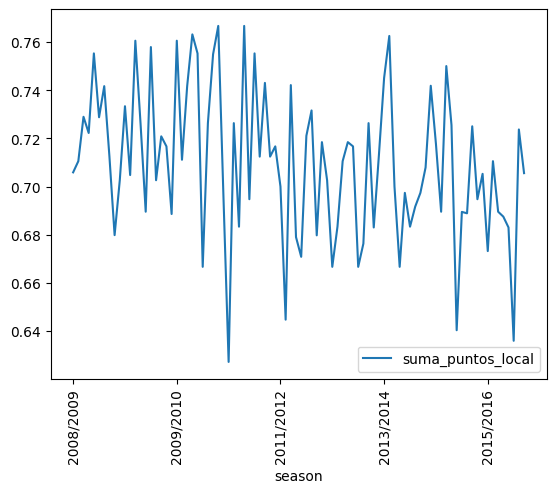

In [83]:
df_match_teams_leag_count.groupby(['season','name_country']).agg(
    {
        'suma_puntos_local':'mean',
        #'suma_puntos_visitante':'mean'
    }
).reset_index().set_index('season').plot()
plt.xticks(rotation='vertical')
plt.show()

In [84]:
group_seas_count = df_match_teams_leag_count.groupby(['season','name_country']).agg(
    {
        'suma_puntos_local':'mean',
        #'suma_puntos_visitante':'mean'
    }
).reset_index()\
    .assign(
        season_start = lambda x: x['season'].str.split('/').str[0],
        )
group_seas_count

,season,name_country,suma_puntos_local,season_start
0,2008/2009,Belgium,0.705882,2008
1,2008/2009,England,0.710526,2008
2,2008/2009,France,0.728947,2008
3,2008/2009,Germany,0.722222,2008
4,2008/2009,Italy,0.755263,2008
...,...,...,...,...
83,2015/2016,Poland,0.687500,2015
84,2015/2016,Portugal,0.683007,2015
85,2015/2016,Scotland,0.635965,2015
86,2015/2016,Spain,0.723684,2015


<Axes: xlabel='season_start', ylabel='suma_puntos_local'>

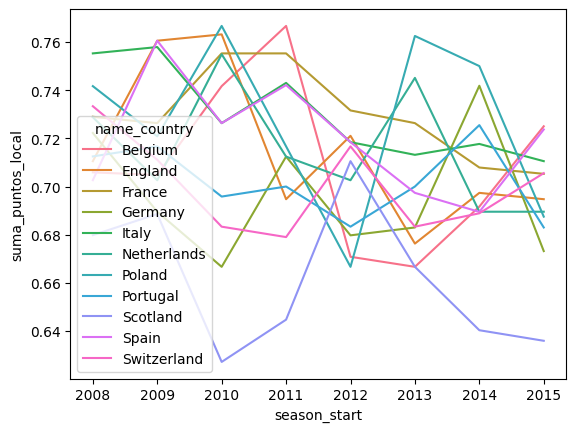

In [55]:
import seaborn as sns
sns.lineplot(x='season_start', y='suma_puntos_local', data=group_seas_count, hue='name_country')

In [85]:
df_match_teams_leag_count[['home_team_name','resultado_local']]

,home_team_name,resultado_local
0,Beerschot AC,gana
1,Beerschot AC,gana
2,Beerschot AC,pierde
3,Beerschot AC,gana
4,Beerschot AC,pierde
...,...,...
25974,FC Zürich,pierde
25975,FC St. Gallen,gana
25976,FC St. Gallen,empata
25977,FC Thun,gana


In [86]:
df_match_teams_leag_count[['away_team_name', 'resultado_visitante']]

,away_team_name,resultado_visitante
0,KRC Genk,pierde
1,KRC Genk,pierde
2,KRC Genk,gana
3,KRC Genk,pierde
4,KRC Genk,gana
...,...,...
25974,Lugano,gana
25975,Lugano,pierde
25976,Lugano,empata
25977,Lugano,pierde


In [87]:
pd.concat(
    [
        df_match_teams_leag_count[['home_team_name','resultado_local']],
        df_match_teams_leag_count[['away_team_name', 'resultado_visitante']]
    ]
    )

,home_team_name,resultado_local,away_team_name,resultado_visitante
0,Beerschot AC,gana,NaN,NaN
1,Beerschot AC,gana,NaN,NaN
2,Beerschot AC,pierde,NaN,NaN
3,Beerschot AC,gana,NaN,NaN
4,Beerschot AC,pierde,NaN,NaN
...,...,...,...,...
25974,NaN,NaN,Lugano,gana
25975,NaN,NaN,Lugano,pierde
25976,NaN,NaN,Lugano,empata
25977,NaN,NaN,Lugano,pierde


In [88]:
todos_resultados_equipos = pd.concat(
    [
        df_match_teams_leag_count[['home_team_name','resultado_local']].rename(
            columns={
                'home_team_name':'team_name',
                'resultado_local':'resultado'
            }
        ),
        df_match_teams_leag_count[['away_team_name', 'resultado_visitante']].rename(
            columns={
                'away_team_name':'team_name',
                'resultado_visitante':'resultado'
            }
        )
    ]
    )
todos_resultados_equipos

,team_name,resultado
0,Beerschot AC,gana
1,Beerschot AC,gana
2,Beerschot AC,pierde
3,Beerschot AC,gana
4,Beerschot AC,pierde
...,...,...
25974,Lugano,gana
25975,Lugano,pierde
25976,Lugano,empata
25977,Lugano,pierde


In [89]:
todos_resultados_equipos[todos_resultados_equipos.resultado=='gana']

,team_name,resultado
0,Beerschot AC,gana
1,Beerschot AC,gana
3,Beerschot AC,gana
9,SV Zulte-Waregem,gana
10,SV Zulte-Waregem,gana
...,...,...
25946,FC Lausanne-Sports,gana
25959,FC Lausanne-Sports,gana
25961,Lugano,gana
25964,Lugano,gana


In [90]:
todos_resultados_equipos[todos_resultados_equipos.resultado=='gana'].groupby('team_name').count()

,resultado
team_name,
1. FC Kaiserslautern,17
1. FC Köln,60
1. FC Nürnberg,49
1. FSV Mainz 05,88
AC Ajaccio,22
...,...
Xerez Club Deportivo,8
Zagłębie Lubin,59
Zawisza Bydgoszcz,19


In [91]:
todos_resultados_equipos[todos_resultados_equipos.resultado=='gana'].groupby('team_name').count().sort_values('resultado')

,resultado
team_name,
AC Arles-Avignon,3
Córdoba CF,3
DSC Arminia Bielefeld,4
SpVgg Greuther Fürth,4
FC Dordrecht,4
...,...
Manchester United,192
FC Bayern Munich,193
Celtic,218


In [92]:
todos_resultados_equipos[todos_resultados_equipos.resultado=='gana'].groupby('team_name').count().sort_values('resultado',ascending=False).head(1)

,resultado
team_name,
FC Barcelona,234


In [93]:
todos_resultados_equipos[todos_resultados_equipos.resultado=='gana'].groupby('team_name').count().sort_values('resultado').tail(1)

,resultado
team_name,
FC Barcelona,234


### `df_team_atr`

In [94]:
df_team_atr[
    [x for x in df_team_atr.columns if x not in df_match_teams_leag_count.columns]
]

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,60,Balanced,NaN,Little,50,Mixed,Organised,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,52,Balanced,48.0,Normal,56,Mixed,Organised,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,47,Balanced,41.0,Normal,54,Mixed,Organised,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,70,Fast,NaN,Little,70,Long,Organised,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,47,Balanced,NaN,Little,52,Mixed,Organised,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,52,Balanced,NaN,Little,52,Mixed,Organised,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,54,Balanced,NaN,Little,51,Mixed,Organised,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,54,Balanced,NaN,Little,51,Mixed,Organised,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,54,Balanced,42.0,Normal,51,Mixed,Organised,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


In [95]:
sorted([x for x in df_team_atr.columns if x not in df_match_teams_leag_count.columns])

['buildUpPlayDribbling',
 'buildUpPlayDribblingClass',
 'buildUpPlayPassing',
 'buildUpPlayPassingClass',
 'buildUpPlayPositioningClass',
 'buildUpPlaySpeed',
 'buildUpPlaySpeedClass',
 'chanceCreationCrossing',
 'chanceCreationCrossingClass',
 'chanceCreationPassing',
 'chanceCreationPassingClass',
 'chanceCreationPositioningClass',
 'chanceCreationShooting',
 'chanceCreationShootingClass',
 'defenceAggression',
 'defenceAggressionClass',
 'defenceDefenderLineClass',
 'defencePressure',
 'defencePressureClass',
 'defenceTeamWidth',
 'defenceTeamWidthClass',
 'id',
 'team_api_id',
 'team_fifa_api_id']

- Fíjense cómo de todas las features que tiene esta tabla, hay 2 columnas: 1 numérica y otra categórica.
- Para fines prácticos y por "pragmáticos", podríamos preferir quedarnos con las features numéricas y que, si tuviera que haber alguna partición en categorías (**$...Class$**), que el algoritmo que usemos al final, los elabore de manera óptima y no esté sesgado por nuestra división... si para algún algoritmo o análisis en particular vemos que funcionan mejor las categóricas, las *"traemos*"" después.

In [96]:
[x for x in df_team_atr.columns if x not in df_match_teams_leag_count.columns and not x.endswith('Class')]

['id',
 'team_fifa_api_id',
 'team_api_id',
 'buildUpPlaySpeed',
 'buildUpPlayDribbling',
 'buildUpPlayPassing',
 'chanceCreationPassing',
 'chanceCreationCrossing',
 'chanceCreationShooting',
 'defencePressure',
 'defenceAggression',
 'defenceTeamWidth']

- Intentemos primero con el pegado del equipo local
- Usaremos el `team_api_id` de la tabla `df_team_atr` para pegarlo con nuestra tabla `df_match_teams_leag_count`
- Del lado de `df_match_teams_leag_count` usaremos, en este primer paso, la columna `home_team_api_id` 

In [120]:
df_match_teams_atrr_leag_count = pd.merge(
    df_match_teams_leag_count.rename(columns={
        'date':'date_match'
    }),df_team_atr[
    ['date']+[x for x in df_team_atr.columns if x not in df_match_teams_leag_count.columns and not x.endswith('Class')]
    ]
    .rename(columns={
        'date':'date_atr'
    }), left_on="home_team_api_id", right_on="team_api_id"
)#pd.merge_asof(df_match_teams_leag_count,df_team_atr, left_on="home_team_api_id", right_on="team_api_id", allow_exact_matches=False)
df_match_teams_atrr_leag_count

,date_match,country_id,league_id,season,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_name,...,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,2009-01-18 00:00:00,1,1,2008/2009,492769,9993,9987,4,1,Beerschot AC,...,9993,35,NaN,35,45,40,50,70,70,70
1,2009-01-18 00:00:00,1,1,2008/2009,492769,9993,9987,4,1,Beerschot AC,...,9993,47,NaN,37,54,64,67,33,34,48
2,2009-01-18 00:00:00,1,1,2008/2009,492769,9993,9987,4,1,Beerschot AC,...,9993,55,NaN,55,47,46,49,45,46,50
3,2009-01-18 00:00:00,1,1,2008/2009,492769,9993,9987,4,1,Beerschot AC,...,9993,47,NaN,39,38,64,49,45,46,67
4,2009-12-26 00:00:00,1,1,2009/2010,665651,9993,9987,1,0,Beerschot AC,...,9993,35,NaN,35,45,40,50,70,70,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142088,2015-08-08 00:00:00,24558,24558,2015/2016,1992066,9956,7896,6,1,Grasshopper Club Zürich,...,9956,67,NaN,53,55,66,63,43,48,62
142089,2015-08-08 00:00:00,24558,24558,2015/2016,1992066,9956,7896,6,1,Grasshopper Club Zürich,...,9956,50,NaN,54,52,54,46,36,43,47
142090,2015-08-08 00:00:00,24558,24558,2015/2016,1992066,9956,7896,6,1,Grasshopper Club Zürich,...,9956,50,NaN,54,52,54,46,36,43,47
142091,2015-08-08 00:00:00,24558,24558,2015/2016,1992066,9956,7896,6,1,Grasshopper Club Zürich,...,9956,50,60.0,54,52,54,46,36,43,47


In [98]:
print(df_match_teams_atrr_leag_count.shape[0])
print(df_match_teams_leag_count.shape[0])

142093
25979


- **¡¡¡¿QUÉ PASÓ?!!!!**
- Se nos multiplicó la tabla!!!!
- Está bien esto?
- Ya luego conoceremos más de base de datos y las cuestiones ténicas que ocasionaron esto, pero, de manera intuitiva lo que podemos decir es que:
    - La *"la llave"* NO está bien construida
    - Tal vez, no debe estar formada sólo por una columna (en este casi, el `id` del equipo)
    - y, nuestra *"llave"* actual aparece más de una vez en las tablas haciendo que se multipliquen muchas veces cada una de las observaciones que teníamos

In [99]:
print(df_match_teams_leag_count.shape[0])
print(df_team_atr.shape[0])

25979
1458


- Ok... en la de los atributos de los equipos hay $1,458$ filas... será que haya la misma cantidad de equipos distintos?
    -  Esto lo podemos checar con el método `nunique()` para saber cuántos valores únicos tiene una `serie` de pandas (o una columna de un `dataframe`)

In [100]:
df_match_teams_leag_count.home_team_api_id.nunique()

299

In [108]:
df_match_teams_leag_count.away_team_api_id.nunique()

299

In [101]:
df_match_teams_leag_count.date.nunique()

1694

In [102]:
df_team_atr.team_api_id.nunique()

288

In [103]:
df_team_atr.date.nunique()

6

In [177]:
df_team_atr[['team_api_id','date']].value_counts().to_frame(name='freq').sort_values(by='freq',ascending=False)

freq
team_api_id date                     
9996        2015-09-10 00:00:00     2
2182        2011-02-22 00:00:00     1
1601        2013-09-20 00:00:00     1
            2014-09-19 00:00:00     1
            2015-09-10 00:00:00     1
...                               ...
158085      2014-09-19 00:00:00     1
            2015-09-10 00:00:00     1
208931      2014-09-19 00:00:00     1
            2015-09-10 00:00:00     1
274581      2015-09-10 00:00:00     1

[1457 rows x 1 columns]

- Entonces hay muchas fechas por cada equipo en la tabla de partidos.
- Lo cual tiene sentido porque un equipo juega en diferentes fechas
- Por otro lado, en la de atributos, también vemos que hay 6 fechas diferentes, por lo que un equipo, podría tener varias fechas en la que se fueron actualizando sus atributos
- Esta es la razón por la que estamos teniendo un aumento tan grande en el tamaño de nuestra tabla
- Todas esas listas de atributos son válidas de considerar al momento de predecir el resultado de un partido?
- Aquí es donde entra otro concepto con el que hay que TENER MUCHÍSIMO CUIDADO!!!

In [178]:
df_match_teams_atrr_leag_count[
['season','match_api_id','date_match','date_atr','home_team_api_id','home_team_name']+[x for x in df_match_teams_atrr_leag_count.columns if x in df_team_atr.columns]
].sort_values(
    ['date_match','date_atr']
).head(20)


,season,match_api_id,date_match,date_atr,home_team_api_id,home_team_name,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
136949,2008/2009,486263,2008-07-18 00:00:00,2010-02-22 00:00:00,10192,BSC Young Boys,131,896,9931,40,NaN,45,50,65,50,60,60,60
136950,2008/2009,486263,2008-07-18 00:00:00,2011-02-22 00:00:00,10192,BSC Young Boys,132,896,9931,46,NaN,40,51,54,49,38,53,55
136951,2008/2009,486263,2008-07-18 00:00:00,2012-02-22 00:00:00,10192,BSC Young Boys,133,896,9931,61,NaN,46,66,66,54,47,58,53
136952,2008/2009,486263,2008-07-18 00:00:00,2013-09-20 00:00:00,10192,BSC Young Boys,134,896,9931,61,NaN,46,66,66,54,47,58,53
136953,2008/2009,486263,2008-07-18 00:00:00,2014-09-19 00:00:00,10192,BSC Young Boys,135,896,9931,61,63.0,46,66,66,54,47,58,53
136954,2008/2009,486263,2008-07-18 00:00:00,2015-09-10 00:00:00,10192,BSC Young Boys,136,896,9931,61,63.0,46,66,66,54,47,58,53
138215,2008/2009,486264,2008-07-19 00:00:00,2010-02-22 00:00:00,9930,FC Aarau,1163,110770,10179,35,NaN,60,50,60,60,35,40,45
138216,2008/2009,486264,2008-07-19 00:00:00,2011-02-22 00:00:00,9930,FC Aarau,1164,110770,10179,47,NaN,56,67,56,54,41,43,39
138217,2008/2009,486264,2008-07-19 00:00:00,2012-02-22 00:00:00,9930,FC Aarau,1165,110770,10179,61,NaN,37,62,50,53,45,43,54
138218,2008/2009,486264,2008-07-19 00:00:00,2013-09-20 00:00:00,9930,FC Aarau,1166,110770,10179,61,NaN,37,62,50,53,45,43,54


In [179]:
df_match_teams_atrr_leag_count[
df_match_teams_atrr_leag_count.date_match<df_match_teams_atrr_leag_count.date_atr
][
['season','match_api_id','date_match','date_atr','home_team_api_id','home_team_name']+[x for x in df_match_teams_atrr_leag_count.columns if x in df_team_atr.columns]
].sort_values(
    ['date_match','date_atr']
)


,season,match_api_id,date_match,date_atr,home_team_api_id,home_team_name,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
136949,2008/2009,486263,2008-07-18 00:00:00,2010-02-22 00:00:00,10192,BSC Young Boys,131,896,9931,40,NaN,45,50,65,50,60,60,60
136950,2008/2009,486263,2008-07-18 00:00:00,2011-02-22 00:00:00,10192,BSC Young Boys,132,896,9931,46,NaN,40,51,54,49,38,53,55
136951,2008/2009,486263,2008-07-18 00:00:00,2012-02-22 00:00:00,10192,BSC Young Boys,133,896,9931,61,NaN,46,66,66,54,47,58,53
136952,2008/2009,486263,2008-07-18 00:00:00,2013-09-20 00:00:00,10192,BSC Young Boys,134,896,9931,61,NaN,46,66,66,54,47,58,53
136953,2008/2009,486263,2008-07-18 00:00:00,2014-09-19 00:00:00,10192,BSC Young Boys,135,896,9931,61,63.0,46,66,66,54,47,58,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136054,2015/2016,1992085,2015-08-30 00:00:00,2015-09-10 00:00:00,9956,Grasshopper Club Zürich,1439,900,10192,52,56.0,64,39,66,46,44,34,50
138676,2015/2016,1992083,2015-08-30 00:00:00,2015-09-10 00:00:00,10191,FC Thun,1168,110770,10179,61,57.0,37,62,50,53,45,47,54
140173,2015/2016,1992084,2015-08-30 00:00:00,2015-09-10 00:00:00,9931,FC Basel,451,894,10243,62,49.0,46,47,50,54,47,43,56
100445,2015/2016,2015833,2015-08-31 00:00:00,2015-09-10 00:00:00,6367,Uniao da Madeira,1353,1887,7844,40,52.0,39,53,62,58,37,40,64


In [180]:
df_match_teams_atrr_leag_count[
df_match_teams_atrr_leag_count.date_match<df_match_teams_atrr_leag_count.date_atr
][
['season','match_api_id','date_match','date_atr','home_team_api_id','home_team_name','away_team_api_id','away_team_name']+[x for x in df_match_teams_atrr_leag_count.columns if x in df_team_atr.columns]
].sort_values(
    ['date_match','date_atr']
)


,season,match_api_id,date_match,date_atr,home_team_api_id,home_team_name,away_team_api_id,away_team_name,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
136949,2008/2009,486263,2008-07-18 00:00:00,2010-02-22 00:00:00,10192,BSC Young Boys,9931,FC Basel,131,896,9931,40,NaN,45,50,65,50,60,60,60
136950,2008/2009,486263,2008-07-18 00:00:00,2011-02-22 00:00:00,10192,BSC Young Boys,9931,FC Basel,132,896,9931,46,NaN,40,51,54,49,38,53,55
136951,2008/2009,486263,2008-07-18 00:00:00,2012-02-22 00:00:00,10192,BSC Young Boys,9931,FC Basel,133,896,9931,61,NaN,46,66,66,54,47,58,53
136952,2008/2009,486263,2008-07-18 00:00:00,2013-09-20 00:00:00,10192,BSC Young Boys,9931,FC Basel,134,896,9931,61,NaN,46,66,66,54,47,58,53
136953,2008/2009,486263,2008-07-18 00:00:00,2014-09-19 00:00:00,10192,BSC Young Boys,9931,FC Basel,135,896,9931,61,63.0,46,66,66,54,47,58,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136054,2015/2016,1992085,2015-08-30 00:00:00,2015-09-10 00:00:00,9956,Grasshopper Club Zürich,10192,BSC Young Boys,1439,900,10192,52,56.0,64,39,66,46,44,34,50
138676,2015/2016,1992083,2015-08-30 00:00:00,2015-09-10 00:00:00,10191,FC Thun,10179,FC Sion,1168,110770,10179,61,57.0,37,62,50,53,45,47,54
140173,2015/2016,1992084,2015-08-30 00:00:00,2015-09-10 00:00:00,9931,FC Basel,10243,FC Zürich,451,894,10243,62,49.0,46,47,50,54,47,43,56
100445,2015/2016,2015833,2015-08-31 00:00:00,2015-09-10 00:00:00,6367,Uniao da Madeira,7844,Vitória Guimarães,1353,1887,7844,40,52.0,39,53,62,58,37,40,64


- **LA DUDA DEL MILLÓN!!!** Serían válidas todas esosa atributos de los equipos que se calcularon POSTERIORMENTE a la fecha del partido?
- Por ejemplo, para el partido con id `486263`, que tuvo fecha el `2008-07-18` pero sus atributos se calcularon hasta el `2010-02-22`, sería válido usar esa info de `dribbling, passing, speed,...`??????????????????

In [181]:
df_match_teams_atrr_leag_count[
df_match_teams_atrr_leag_count.match_api_id==486263
][
['season','match_api_id','date_match','date_atr','home_team_api_id','home_team_name']+[x for x in df_match_teams_atrr_leag_count.columns if x in df_team_atr.columns]
].sort_values(
    ['date_match','date_atr']
)


,season,match_api_id,date_match,date_atr,home_team_api_id,home_team_name,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
136949,2008/2009,486263,2008-07-18 00:00:00,2010-02-22 00:00:00,10192,BSC Young Boys,131,896,9931,40,NaN,45,50,65,50,60,60,60
136950,2008/2009,486263,2008-07-18 00:00:00,2011-02-22 00:00:00,10192,BSC Young Boys,132,896,9931,46,NaN,40,51,54,49,38,53,55
136951,2008/2009,486263,2008-07-18 00:00:00,2012-02-22 00:00:00,10192,BSC Young Boys,133,896,9931,61,NaN,46,66,66,54,47,58,53
136952,2008/2009,486263,2008-07-18 00:00:00,2013-09-20 00:00:00,10192,BSC Young Boys,134,896,9931,61,NaN,46,66,66,54,47,58,53
136953,2008/2009,486263,2008-07-18 00:00:00,2014-09-19 00:00:00,10192,BSC Young Boys,135,896,9931,61,63.0,46,66,66,54,47,58,53
136954,2008/2009,486263,2008-07-18 00:00:00,2015-09-10 00:00:00,10192,BSC Young Boys,136,896,9931,61,63.0,46,66,66,54,47,58,53


In [182]:
df_match_teams_atrr_leag_count[
df_match_teams_atrr_leag_count.match_api_id==486263
][
['season','match_api_id','date_match','date_atr','home_team_api_id','home_team_name', 'away_team_api_id','away_team_name']+[x for x in df_match_teams_atrr_leag_count.columns if x in df_team_atr.columns]
].sort_values(
    ['date_match','date_atr']
)


,season,match_api_id,date_match,date_atr,home_team_api_id,home_team_name,away_team_api_id,away_team_name,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
136949,2008/2009,486263,2008-07-18 00:00:00,2010-02-22 00:00:00,10192,BSC Young Boys,9931,FC Basel,131,896,9931,40,NaN,45,50,65,50,60,60,60
136950,2008/2009,486263,2008-07-18 00:00:00,2011-02-22 00:00:00,10192,BSC Young Boys,9931,FC Basel,132,896,9931,46,NaN,40,51,54,49,38,53,55
136951,2008/2009,486263,2008-07-18 00:00:00,2012-02-22 00:00:00,10192,BSC Young Boys,9931,FC Basel,133,896,9931,61,NaN,46,66,66,54,47,58,53
136952,2008/2009,486263,2008-07-18 00:00:00,2013-09-20 00:00:00,10192,BSC Young Boys,9931,FC Basel,134,896,9931,61,NaN,46,66,66,54,47,58,53
136953,2008/2009,486263,2008-07-18 00:00:00,2014-09-19 00:00:00,10192,BSC Young Boys,9931,FC Basel,135,896,9931,61,63.0,46,66,66,54,47,58,53
136954,2008/2009,486263,2008-07-18 00:00:00,2015-09-10 00:00:00,10192,BSC Young Boys,9931,FC Basel,136,896,9931,61,63.0,46,66,66,54,47,58,53


- DÉMOSLE LA BIENVENIDA AL ***"leakage"***!!!
- Al momento de construir Features o hacer análisis de cara a un modelo, asegúrate que el insumo de lo que construyas NO utilice información que no se tendrá al momento de una nueva predicción
- [*"Fallar no es una opción!!!" - Apolo 13*](https://www.youtube.com/watch?v=lkHzRJmPFn0)
- Siempre asegúrate de que únicamente estás utilizando EXACTAMENTE LO MISMO que tienen tus colegas de la Luna, es decir, lo mismo que tuvieras en "producción" al momento de solicitar una nueva evaluación
- Parece chiste, pero es anécdota:`requested_m` *vs* `offered_m`

<br>
.
<br>

- --> ¿Qué pasaría si incluyo como features del modelo los goles del equipo local y del visitante en el partido del que quiero predecir su `target`.<--
- Por lo tanto aquí es donde hay que empezar a ponernos más exquisitos al momento considerar observaciones válidas para que nuestro modelo se entrene
- Y la siguiente condición, de entrar, propiciará que se pierdan registros completos de partidos: todos aquellos que NO tienen ninguna fecha de atributos válida para el equipo local

In [183]:
df_match_teams_atrr_leag_count_VALID = df_match_teams_atrr_leag_count[
df_match_teams_atrr_leag_count.date_match>df_match_teams_atrr_leag_count.date_atr
][
['season','match_api_id','date_match','date_atr','home_team_api_id','home_team_name', 'away_team_api_id','away_team_name']+[x for x in df_match_teams_atrr_leag_count.columns if x in df_team_atr.columns]
].sort_values(
    ['date_match','date_atr']
)
df_match_teams_atrr_leag_count_VALID

,season,match_api_id,date_match,date_atr,home_team_api_id,home_team_name,away_team_api_id,away_team_name,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
13749,2009/2010,659091,2010-02-23 00:00:00,2010-02-22 00:00:00,10260,Manchester United,8654,West Ham United,1385,19,8654,58,NaN,30,31,70,50,30,70,30
390,2009/2010,665694,2010-02-24 00:00:00,2010-02-22 00:00:00,9999,KSV Roeselare,9987,KRC Genk,485,673,9987,45,NaN,45,50,35,60,70,65,70
7277,2009/2010,665677,2010-02-24 00:00:00,2010-02-22 00:00:00,9984,KSV Cercle Brugge,9986,Sporting Charleroi,1188,670,9986,40,NaN,50,45,43,60,70,70,70
60498,2009/2010,704654,2010-02-24 00:00:00,2010-02-22 00:00:00,8600,Udinese,8529,Cagliari,261,1842,8529,40,NaN,30,30,35,55,40,55,60
66269,2009/2010,704632,2010-02-24 00:00:00,2010-02-22 00:00:00,8535,Fiorentina,8564,Milan,16,47,8564,45,NaN,30,55,45,70,30,35,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135220,2015/2016,1992225,2016-05-25 00:00:00,2015-09-10 00:00:00,9931,FC Basel,9956,Grasshopper Club Zürich,535,322,9956,50,60.0,54,52,54,46,36,43,47
136744,2015/2016,1992228,2016-05-25 00:00:00,2015-09-10 00:00:00,10191,FC Thun,10192,BSC Young Boys,1439,900,10192,52,56.0,64,39,66,46,44,34,50
138358,2015/2016,1992227,2016-05-25 00:00:00,2015-09-10 00:00:00,10199,FC Luzern,10179,FC Sion,1168,110770,10179,61,57.0,37,62,50,53,45,47,54
139650,2015/2016,1992229,2016-05-25 00:00:00,2015-09-10 00:00:00,10243,FC Zürich,9824,FC Vaduz,445,286,9824,53,32.0,56,38,53,46,42,33,58


- Aún así hay muchas más filas de las que teníamos
- Seguramente es porque para un mismo partido tenemos varias fechas de atributos que son anteriores a ese partido y, por lo tanto, válidas

In [184]:
df_match_teams_atrr_leag_count_VALID.match_api_id.nunique()

19919

#### Ideas para aprovechar la info en nuevas features:
- Lo que podría funcionarnos es hacer agrupaciones por cada una de las columnas de atributos
- Esto generaría nuevas features. **Importante que las podamos interpretar correctamente**
- Por practiciad podemos hacer promedios de las columnas que nos trajimos de la tabla de atributos de los equipos
- Podemos hacer un truco para construir rápido el diccionario con las operaciones que queremos hacer para cada grupo

In [185]:
list_cols_atr = [x for x in df_match_teams_atrr_leag_count_VALID.columns if x in df_team_atr.columns and x not in ['id','team_fifa_api_id','team_api_id']]
list_cols_atr

['buildUpPlaySpeed',
 'buildUpPlayDribbling',
 'buildUpPlayPassing',
 'chanceCreationPassing',
 'chanceCreationCrossing',
 'chanceCreationShooting',
 'defencePressure',
 'defenceAggression',
 'defenceTeamWidth']

In [186]:
dict_agg_atr = {}
for atr in list_cols_atr:
    dict_agg_atr[atr] = 'mean'
dict_agg_atr

{'buildUpPlaySpeed': 'mean',
 'buildUpPlayDribbling': 'mean',
 'buildUpPlayPassing': 'mean',
 'chanceCreationPassing': 'mean',
 'chanceCreationCrossing': 'mean',
 'chanceCreationShooting': 'mean',
 'defencePressure': 'mean',
 'defenceAggression': 'mean',
 'defenceTeamWidth': 'mean'}

In [187]:
gb_atr_local = df_match_teams_atrr_leag_count_VALID.groupby(['match_api_id']).agg(
    dict_agg_atr
)
gb_atr_local.columns = [x+'_avg_local' for x in gb_atr_local.columns]
gb_atr_local

,buildUpPlaySpeed_avg_local,buildUpPlayDribbling_avg_local,buildUpPlayPassing_avg_local,chanceCreationPassing_avg_local,chanceCreationCrossing_avg_local,chanceCreationShooting_avg_local,defencePressure_avg_local,defenceAggression_avg_local,defenceTeamWidth_avg_local
match_api_id,,,,,,,,,
654153,66.000000,NaN,70.000000,35.000000,40.000000,50.000000,65.000000,30.000000,65.000000
654399,30.000000,NaN,70.000000,35.000000,65.000000,35.000000,30.000000,55.000000,30.000000
654423,70.000000,NaN,35.000000,70.000000,50.000000,70.000000,55.000000,70.000000,70.000000
654425,30.000000,NaN,70.000000,35.000000,65.000000,35.000000,30.000000,55.000000,30.000000
654427,66.000000,NaN,70.000000,35.000000,40.000000,50.000000,65.000000,30.000000,65.000000
...,...,...,...,...,...,...,...,...,...
2216668,61.833333,54.5,58.000000,57.333333,55.000000,49.500000,47.833333,48.000000,57.000000
2216669,61.333333,48.0,56.333333,65.000000,58.666667,55.000000,53.666667,53.333333,58.000000
2216670,38.000000,49.0,52.000000,46.666667,41.000000,48.666667,38.333333,53.333333,41.666667


- Tomando como base la tabla antes de pegarle los atributos y que se nos multiplicaran las filas: `df_match_teams_leag_count`

In [188]:
len(df_match_teams_leag_count)

25979

In [189]:
df_match_teams_atrr_agg_local = df_match_teams_leag_count.join(
    gb_atr_local, on='match_api_id', how='left'
)
df_match_teams_atrr_agg_local

,date,country_id,league_id,season,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_name,...,name_country,buildUpPlaySpeed_avg_local,buildUpPlayDribbling_avg_local,buildUpPlayPassing_avg_local,chanceCreationPassing_avg_local,chanceCreationCrossing_avg_local,chanceCreationShooting_avg_local,defencePressure_avg_local,defenceAggression_avg_local,defenceTeamWidth_avg_local
0,2009-01-18 00:00:00,1,1,2008/2009,492769,9993,9987,4,1,Beerschot AC,...,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-12-26 00:00:00,1,1,2009/2010,665651,9993,9987,1,0,Beerschot AC,...,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-12-05 00:00:00,1,1,2010/2011,838694,9993,9987,0,1,Beerschot AC,...,Belgium,45.000000,NaN,45.000000,50.000000,35.000000,60.000000,70.0,65.000000,70.000000
3,2011-12-02 00:00:00,1,1,2011/2012,1032814,9993,9987,2,0,Beerschot AC,...,Belgium,55.500000,NaN,48.500000,57.500000,50.500000,55.500000,59.0,56.000000,62.000000
4,2013-02-09 00:00:00,1,1,2012/2013,1224185,9993,9987,0,2,Beerschot AC,...,Belgium,54.666667,NaN,50.666667,56.666667,49.666667,55.666667,55.0,52.333333,59.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,2016-05-11 00:00:00,24558,24558,2015/2016,1992215,10243,7896,0,4,FC Zürich,...,Switzerland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,2015-07-19 00:00:00,24558,24558,2015/2016,1992055,10190,7896,2,0,FC St. Gallen,...,Switzerland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,2016-02-28 00:00:00,24558,24558,2015/2016,1992157,10190,7896,3,3,FC St. Gallen,...,Switzerland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,2015-10-25 00:00:00,24558,24558,2015/2016,1992114,10191,7896,2,1,FC Thun,...,Switzerland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


-->>> **ENTONCES**, para evitar el **leakage**, una de las cosas que hay que establecer es: **¿cuál es el último momento en el que una feature podría ser válida?**

- En nuestro caso que quisiéramos hacer una predicción de si uno de los equipos suma puntos en un partido en particular, podría ser **hasta un instante antes de que inicie el partido**

- Eso quiere decir que todas las features que **se generaron DURANTE ESE PARTIDO o POSTERIOR A ÉL** ya **NO SERÍAN FEATURES VÁLIDAS** porque, de considerarlas, estaríamos cayendo en **leakage**

**$¿¿¿DUDAS???$** ... 



<br>
.

<br>
.

<br>
.

<br>
.

<br>
.

<br>
.

<br>
.

<br>
.

<br>
.


<br>
.

<br>
.

<br>
.

<br>
.

<br>
.

<br>
.

<br>
.

<br>
.

<br>
.

- Ahora toca hacer lo mismo para el equipo visitante... **TAREA!** XD

<br>
.

<br>
.

<br>
.

<br>


- Ahora intentemos con el pegado del equipo visitante
- Usaremos el `team_api_id` de la tabla `df_team_atr` para pegarlo con nuestra tabla `df_match_teams_leag_count`
- Del lado de `df_match_teams_leag_count` usaremos, en este primer paso, la columna `away_team_api_id`

In [190]:
df_match_teams_atrr_leag_count = pd.merge(
    df_match_teams_leag_count.rename(columns={
        'date':'date_match'
    }),df_team_atr[
    ['date']+[x for x in df_team_atr.columns if x not in df_match_teams_leag_count.columns and not x.endswith('Class')]
    ]
    .rename(columns={
        'date':'date_atr'
    }), left_on="away_team_api_id", right_on="team_api_id"
)#pd.merge_asof(df_match_teams_leag_count,df_team_atr, left_on="home_team_api_id", right_on="team_api_id", allow_exact_matches=False)
df_match_teams_atrr_leag_count

,date_match,country_id,league_id,season,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_name,...,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,2009-01-18 00:00:00,1,1,2008/2009,492769,9993,9987,4,1,Beerschot AC,...,9987,45,NaN,45,50,35,60,70,65,70
1,2009-01-18 00:00:00,1,1,2008/2009,492769,9993,9987,4,1,Beerschot AC,...,9987,66,NaN,52,65,66,51,48,47,54
2,2009-01-18 00:00:00,1,1,2008/2009,492769,9993,9987,4,1,Beerschot AC,...,9987,53,NaN,55,55,48,56,47,45,55
3,2009-01-18 00:00:00,1,1,2008/2009,492769,9993,9987,4,1,Beerschot AC,...,9987,58,NaN,38,67,48,56,47,45,55
4,2009-01-18 00:00:00,1,1,2008/2009,492769,9993,9987,4,1,Beerschot AC,...,9987,58,52.0,38,67,48,56,47,45,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142095,2012-09-26 00:00:00,24558,24558,2012/2013,1227784,9777,7730,0,1,Servette FC,...,7730,37,55.0,49,52,60,52,46,44,55
142096,2013-02-23 00:00:00,24558,24558,2012/2013,1227838,9777,7730,1,0,Servette FC,...,7730,30,NaN,60,40,60,60,55,60,50
142097,2013-02-23 00:00:00,24558,24558,2012/2013,1227838,9777,7730,1,0,Servette FC,...,7730,37,NaN,49,52,60,48,43,43,55
142098,2013-02-23 00:00:00,24558,24558,2012/2013,1227838,9777,7730,1,0,Servette FC,...,7730,51,NaN,49,52,60,48,43,43,55


In [191]:
print(df_match_teams_atrr_leag_count.shape[0])
print(df_match_teams_leag_count.shape[0])

142100
25979


In [192]:
df_match_teams_atrr_leag_count[
df_match_teams_atrr_leag_count.date_match<df_match_teams_atrr_leag_count.date_atr
][
['season','match_api_id','date_match','date_atr','away_team_api_id','away_team_name']+[x for x in df_match_teams_atrr_leag_count.columns if x in df_team_atr.columns]
].sort_values(
    ['date_match','date_atr']
)

,season,match_api_id,date_match,date_atr,away_team_api_id,away_team_name,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
136949,2008/2009,486263,2008-07-18 00:00:00,2010-02-22 00:00:00,9931,FC Basel,131,896,9931,40,NaN,45,50,65,50,60,60,60
136950,2008/2009,486263,2008-07-18 00:00:00,2011-02-22 00:00:00,9931,FC Basel,132,896,9931,46,NaN,40,51,54,49,38,53,55
136951,2008/2009,486263,2008-07-18 00:00:00,2012-02-22 00:00:00,9931,FC Basel,133,896,9931,61,NaN,46,66,66,54,47,58,53
136952,2008/2009,486263,2008-07-18 00:00:00,2013-09-20 00:00:00,9931,FC Basel,134,896,9931,61,NaN,46,66,66,54,47,58,53
136953,2008/2009,486263,2008-07-18 00:00:00,2014-09-19 00:00:00,9931,FC Basel,135,896,9931,61,63.0,46,66,66,54,47,58,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136054,2015/2016,1992085,2015-08-30 00:00:00,2015-09-10 00:00:00,10192,BSC Young Boys,1439,900,10192,52,56.0,64,39,66,46,44,34,50
138676,2015/2016,1992083,2015-08-30 00:00:00,2015-09-10 00:00:00,10179,FC Sion,1168,110770,10179,61,57.0,37,62,50,53,45,47,54
140173,2015/2016,1992084,2015-08-30 00:00:00,2015-09-10 00:00:00,10243,FC Zürich,451,894,10243,62,49.0,46,47,50,54,47,43,56
100445,2015/2016,2015833,2015-08-31 00:00:00,2015-09-10 00:00:00,7844,Vitória Guimarães,1353,1887,7844,40,52.0,39,53,62,58,37,40,64


In [193]:
df_match_teams_atrr_leag_count[
df_match_teams_atrr_leag_count.match_api_id==486263
][
['season','match_api_id','date_match','date_atr','away_team_api_id','away_team_name']+[x for x in df_match_teams_atrr_leag_count.columns if x in df_team_atr.columns]
].sort_values(
    ['date_match','date_atr']
)

,season,match_api_id,date_match,date_atr,away_team_api_id,away_team_name,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
136949,2008/2009,486263,2008-07-18 00:00:00,2010-02-22 00:00:00,9931,FC Basel,131,896,9931,40,NaN,45,50,65,50,60,60,60
136950,2008/2009,486263,2008-07-18 00:00:00,2011-02-22 00:00:00,9931,FC Basel,132,896,9931,46,NaN,40,51,54,49,38,53,55
136951,2008/2009,486263,2008-07-18 00:00:00,2012-02-22 00:00:00,9931,FC Basel,133,896,9931,61,NaN,46,66,66,54,47,58,53
136952,2008/2009,486263,2008-07-18 00:00:00,2013-09-20 00:00:00,9931,FC Basel,134,896,9931,61,NaN,46,66,66,54,47,58,53
136953,2008/2009,486263,2008-07-18 00:00:00,2014-09-19 00:00:00,9931,FC Basel,135,896,9931,61,63.0,46,66,66,54,47,58,53
136954,2008/2009,486263,2008-07-18 00:00:00,2015-09-10 00:00:00,9931,FC Basel,136,896,9931,61,63.0,46,66,66,54,47,58,53


In [194]:
df_match_teams_atrr_leag_count_VALID = df_match_teams_atrr_leag_count[
df_match_teams_atrr_leag_count.date_match>df_match_teams_atrr_leag_count.date_atr
][
['season','match_api_id','date_match','date_atr','away_team_api_id','away_team_name']+[x for x in df_match_teams_atrr_leag_count.columns if x in df_team_atr.columns]
].sort_values(
    ['date_match','date_atr']
)
df_match_teams_atrr_leag_count_VALID

,season,match_api_id,date_match,date_atr,away_team_api_id,away_team_name,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
13749,2009/2010,659091,2010-02-23 00:00:00,2010-02-22 00:00:00,8654,West Ham United,1385,19,8654,58,NaN,30,31,70,50,30,70,30
390,2009/2010,665694,2010-02-24 00:00:00,2010-02-22 00:00:00,9987,KRC Genk,485,673,9987,45,NaN,45,50,35,60,70,65,70
7277,2009/2010,665677,2010-02-24 00:00:00,2010-02-22 00:00:00,9986,Sporting Charleroi,1188,670,9986,40,NaN,50,45,43,60,70,70,70
60498,2009/2010,704654,2010-02-24 00:00:00,2010-02-22 00:00:00,8529,Cagliari,261,1842,8529,40,NaN,30,30,35,55,40,55,60
66269,2009/2010,704632,2010-02-24 00:00:00,2010-02-22 00:00:00,8564,Milan,16,47,8564,45,NaN,30,55,45,70,30,35,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135220,2015/2016,1992225,2016-05-25 00:00:00,2015-09-10 00:00:00,9956,Grasshopper Club Zürich,535,322,9956,50,60.0,54,52,54,46,36,43,47
136744,2015/2016,1992228,2016-05-25 00:00:00,2015-09-10 00:00:00,10192,BSC Young Boys,1439,900,10192,52,56.0,64,39,66,46,44,34,50
138358,2015/2016,1992227,2016-05-25 00:00:00,2015-09-10 00:00:00,10179,FC Sion,1168,110770,10179,61,57.0,37,62,50,53,45,47,54
139650,2015/2016,1992229,2016-05-25 00:00:00,2015-09-10 00:00:00,9824,FC Vaduz,445,286,9824,53,32.0,56,38,53,46,42,33,58


In [195]:
df_match_teams_atrr_leag_count_VALID.match_api_id.nunique()

19919

In [196]:
list_cols_atr = [x for x in df_match_teams_atrr_leag_count_VALID.columns if x in df_team_atr.columns and x not in ['id','team_fifa_api_id','team_api_id']]
list_cols_atr

['buildUpPlaySpeed',
 'buildUpPlayDribbling',
 'buildUpPlayPassing',
 'chanceCreationPassing',
 'chanceCreationCrossing',
 'chanceCreationShooting',
 'defencePressure',
 'defenceAggression',
 'defenceTeamWidth']

In [197]:
dict_agg_atr = {}
for atr in list_cols_atr:
    dict_agg_atr[atr] = 'mean'
dict_agg_atr

{'buildUpPlaySpeed': 'mean',
 'buildUpPlayDribbling': 'mean',
 'buildUpPlayPassing': 'mean',
 'chanceCreationPassing': 'mean',
 'chanceCreationCrossing': 'mean',
 'chanceCreationShooting': 'mean',
 'defencePressure': 'mean',
 'defenceAggression': 'mean',
 'defenceTeamWidth': 'mean'}

In [221]:
gb_atr_visitante = df_match_teams_atrr_leag_count_VALID.groupby(['match_api_id']).agg(
    dict_agg_atr
)
gb_atr_visitante.columns = [x+'_avg_visitante' for x in gb_atr_visitante.columns]
gb_atr_visitante

,buildUpPlaySpeed_avg_visitante,buildUpPlayDribbling_avg_visitante,buildUpPlayPassing_avg_visitante,chanceCreationPassing_avg_visitante,chanceCreationCrossing_avg_visitante,chanceCreationShooting_avg_visitante,defencePressure_avg_visitante,defenceAggression_avg_visitante,defenceTeamWidth_avg_visitante
match_api_id,,,,,,,,,
654153,66.000000,NaN,70.000000,35.000000,40.000000,50.000000,65.000000,30.000000,65.000000
654399,30.000000,NaN,70.000000,35.000000,65.000000,35.000000,30.000000,55.000000,30.000000
654423,70.000000,NaN,35.000000,70.000000,50.000000,70.000000,55.000000,70.000000,70.000000
654425,30.000000,NaN,70.000000,35.000000,65.000000,35.000000,30.000000,55.000000,30.000000
654427,66.000000,NaN,70.000000,35.000000,40.000000,50.000000,65.000000,30.000000,65.000000
...,...,...,...,...,...,...,...,...,...
2216668,61.833333,54.5,58.000000,57.333333,55.000000,49.500000,47.833333,48.000000,57.000000
2216669,61.333333,48.0,56.333333,65.000000,58.666667,55.000000,53.666667,53.333333,58.000000
2216670,38.000000,49.0,52.000000,46.666667,41.000000,48.666667,38.333333,53.333333,41.666667


In [222]:
len(df_match_teams_leag_count)

25979

In [282]:
df_match_teams_atrr_agg_visitante = df_match_teams_leag_count.join(
    gb_atr_visitante, on='match_api_id', how='left'
)
df_match_teams_atrr_agg_visitante

,date,country_id,league_id,season,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_name,...,name_country,buildUpPlaySpeed_avg_visitante,buildUpPlayDribbling_avg_visitante,buildUpPlayPassing_avg_visitante,chanceCreationPassing_avg_visitante,chanceCreationCrossing_avg_visitante,chanceCreationShooting_avg_visitante,defencePressure_avg_visitante,defenceAggression_avg_visitante,defenceTeamWidth_avg_visitante
0,2009-01-18 00:00:00,1,1,2008/2009,492769,9993,9987,4,1,Beerschot AC,...,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-12-26 00:00:00,1,1,2009/2010,665651,9993,9987,1,0,Beerschot AC,...,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-12-05 00:00:00,1,1,2010/2011,838694,9993,9987,0,1,Beerschot AC,...,Belgium,45.000000,NaN,45.000000,50.000000,35.000000,60.000000,70.0,65.000000,70.000000
3,2011-12-02 00:00:00,1,1,2011/2012,1032814,9993,9987,2,0,Beerschot AC,...,Belgium,55.500000,NaN,48.500000,57.500000,50.500000,55.500000,59.0,56.000000,62.000000
4,2013-02-09 00:00:00,1,1,2012/2013,1224185,9993,9987,0,2,Beerschot AC,...,Belgium,54.666667,NaN,50.666667,56.666667,49.666667,55.666667,55.0,52.333333,59.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,2016-05-11 00:00:00,24558,24558,2015/2016,1992215,10243,7896,0,4,FC Zürich,...,Switzerland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,2015-07-19 00:00:00,24558,24558,2015/2016,1992055,10190,7896,2,0,FC St. Gallen,...,Switzerland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,2016-02-28 00:00:00,24558,24558,2015/2016,1992157,10190,7896,3,3,FC St. Gallen,...,Switzerland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,2015-10-25 00:00:00,24558,24558,2015/2016,1992114,10191,7896,2,1,FC Thun,...,Switzerland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [224]:
len(df_match_teams_atrr_agg_visitante)

25979

In [214]:
len(df_match_teams_atrr_agg_local)

25979

### *REshapeando* nuestra base de *"entrenamiento"*

- Dejemos la tabla a nivel de partido-equipo en lugar de nivel partido
  
- Esto implicará que se nos duplique el número de filas pero sería más fácil para el modelo generar una predicción, tendríamos más data **válida** y sería una tabla menos **ancha** lo cual, para términos computacionales, es mejor para temas de rendimiento y, a veces, almacenamiento.

- Esto generaría que pasemos de una tabla de esta estructura: 
| partido | equipo_local | var_01_local| var_02_local| ... | var_N_local| equipo_visitante | var_01_visitante| var_02_visitante| ... | var_N_visitante | TARGET_local| TARGET_visitante |
|--|--|--|--|--|--|--|--|--|--|--|--|--|
|partido1|venados|1|2|..|4|real madrid|5|6|..|8|3|0|
|partido2|barcelona|21|22|..|24|gallos blancos|35|36|..|38|1|1|

- A una tabla de esta estructura: 
| partido | equipo | es_local_o_visitante | var_01| var_02| ... | var_N| TARGET|
|--|--|--|--|--|--|--|--|
|partido1|venados|local|1|2|..|4|3|
|partido1|real madrid|visitante|5|6|..|8|0|
|partido2|barcelona|local|21|22|..|24|1|
|partido2|gallos blancos|visitante|35|36|..|38|1|

In [215]:
df_match_teams_atrr_agg_local.columns

Index(['date', 'country_id', 'league_id', 'season', 'match_api_id',
       'home_team_api_id', 'away_team_api_id', 'home_team_goal',
       'away_team_goal', 'home_team_name', 'away_team_name', 'ganador',
       'dif_goles_local', 'dif_goles_visitante', 'resultado_local_num',
       'resultado_visitante_num', 'resultado_local', 'resultado_visitante',
       'puntos_local', 'puntos_visitante', 'suma_puntos_local',
       'suma_puntos_visitante', 'name_league', 'name_country',
       'buildUpPlaySpeed_avg_local', 'buildUpPlayDribbling_avg_local',
       'buildUpPlayPassing_avg_local', 'chanceCreationPassing_avg_local',
       'chanceCreationCrossing_avg_local', 'chanceCreationShooting_avg_local',
       'defencePressure_avg_local', 'defenceAggression_avg_local',
       'defenceTeamWidth_avg_local'],
      dtype='object')

- Podríamos hacer lo que hicimos para responder la pregunta de Emiliano de **¿Cuál es el equipo que más victorias tiene vs cualesquiera otros equipos?**
- Ahí "duplicamos" las filas y "redujimos a la mitad" las columnas (en nuevas columnas con nombres nuevos/generales - sin hacer distinción entre local y vistante)

```
todos_resultados_equipos = pd.concat(
    [
        df_match_teams_leag_count[['home_team_name','resultado_local']].rename(
            columns={
                'home_team_name':'team_name',
                'resultado_local':'resultado'
            }
        ),
        df_match_teams_leag_count[['away_team_name', 'resultado_visitante']].rename(
            columns={
                'away_team_name':'team_name',
                'resultado_visitante':'resultado'
            }
        )
    ]
    )
todos_resultados_equipos
```

In [217]:
key_columns_local = ['date','match_api_id', 'home_team_name', 'away_team_name']
features_columns_local =  [
    'home_team_goal',
    'dif_goles_local',
    'resultado_local_num',
    'puntos_local',
    'buildUpPlaySpeed_avg_local', 'buildUpPlayDribbling_avg_local',
    'buildUpPlayPassing_avg_local', 'chanceCreationPassing_avg_local',
    'chanceCreationCrossing_avg_local', 'chanceCreationShooting_avg_local',
    'defencePressure_avg_local', 'defenceAggression_avg_local', 'defenceTeamWidth_avg_local',
    
    'suma_puntos_local'
]

df_match_teams_atrr_agg_local[
    key_columns_local + features_columns_local
]

,date,match_api_id,home_team_name,away_team_name,home_team_goal,dif_goles_local,resultado_local_num,puntos_local,buildUpPlaySpeed_avg_local,buildUpPlayDribbling_avg_local,buildUpPlayPassing_avg_local,chanceCreationPassing_avg_local,chanceCreationCrossing_avg_local,chanceCreationShooting_avg_local,defencePressure_avg_local,defenceAggression_avg_local,defenceTeamWidth_avg_local,suma_puntos_local
0,2009-01-18 00:00:00,492769,Beerschot AC,KRC Genk,4,3,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2009-12-26 00:00:00,665651,Beerschot AC,KRC Genk,1,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2010-12-05 00:00:00,838694,Beerschot AC,KRC Genk,0,-1,-1,0,45.000000,NaN,45.000000,50.000000,35.000000,60.000000,70.0,65.000000,70.000000,0
3,2011-12-02 00:00:00,1032814,Beerschot AC,KRC Genk,2,2,1,3,55.500000,NaN,48.500000,57.500000,50.500000,55.500000,59.0,56.000000,62.000000,1
4,2013-02-09 00:00:00,1224185,Beerschot AC,KRC Genk,0,-2,-1,0,54.666667,NaN,50.666667,56.666667,49.666667,55.666667,55.0,52.333333,59.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,2016-05-11 00:00:00,1992215,FC Zürich,Lugano,0,-4,-1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
25975,2015-07-19 00:00:00,1992055,FC St. Gallen,Lugano,2,2,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
25976,2016-02-28 00:00:00,1992157,FC St. Gallen,Lugano,3,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
25977,2015-10-25 00:00:00,1992114,FC Thun,Lugano,2,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


- Las que terminan en **`_avg`** para los equipos visitantes las tendrán cuando la hagan en la tarea :P

In [225]:
key_columns_visitante = ['date','match_api_id', 'away_team_name','home_team_name']
features_columns_visitante =  [
    'away_team_goal',
    'dif_goles_visitante',
    'resultado_visitante_num',
    'puntos_visitante',
    'suma_puntos_visitante',
    'buildUpPlaySpeed_avg_visitante', 'buildUpPlayDribbling_avg_visitante',
    'buildUpPlayPassing_avg_visitante', 'chanceCreationPassing_avg_visitante',
    'chanceCreationCrossing_avg_visitante', 'chanceCreationShooting_avg_visitante',
    'defencePressure_avg_visitante', 'defenceAggression_avg_visitante', 'defenceTeamWidth_avg_visitante'
]

df_match_teams_atrr_agg_visitante[
    key_columns_visitante + features_columns_visitante
]

,date,match_api_id,away_team_name,home_team_name,away_team_goal,dif_goles_visitante,resultado_visitante_num,puntos_visitante,suma_puntos_visitante,buildUpPlaySpeed_avg_visitante,buildUpPlayDribbling_avg_visitante,buildUpPlayPassing_avg_visitante,chanceCreationPassing_avg_visitante,chanceCreationCrossing_avg_visitante,chanceCreationShooting_avg_visitante,defencePressure_avg_visitante,defenceAggression_avg_visitante,defenceTeamWidth_avg_visitante
0,2009-01-18 00:00:00,492769,KRC Genk,Beerschot AC,1,-3,-1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-12-26 00:00:00,665651,KRC Genk,Beerschot AC,0,-1,-1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-12-05 00:00:00,838694,KRC Genk,Beerschot AC,1,1,1,3,1,45.000000,NaN,45.000000,50.000000,35.000000,60.000000,70.0,65.000000,70.000000
3,2011-12-02 00:00:00,1032814,KRC Genk,Beerschot AC,0,-2,-1,0,0,55.500000,NaN,48.500000,57.500000,50.500000,55.500000,59.0,56.000000,62.000000
4,2013-02-09 00:00:00,1224185,KRC Genk,Beerschot AC,2,2,1,3,1,54.666667,NaN,50.666667,56.666667,49.666667,55.666667,55.0,52.333333,59.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,2016-05-11 00:00:00,1992215,Lugano,FC Zürich,4,4,1,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,2015-07-19 00:00:00,1992055,Lugano,FC St. Gallen,0,-2,-1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,2016-02-28 00:00:00,1992157,Lugano,FC St. Gallen,3,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,2015-10-25 00:00:00,1992114,Lugano,FC Thun,1,-1,-1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Renombrándolas de manera general (sin distinguir entre local o visitante)

In [228]:
df_match_teams_atrr_agg_local[
    key_columns_local + features_columns_local
].rename(
    columns = {
        'home_team_name': 'team_name',
        'away_team_name': 'team_name_versus',
        'home_team_goal': 'team_goal',
        'dif_goles_local': 'dif_goles',
        'resultado_local_num':'resultado_num',
        'puntos_local':'puntos',
        'suma_puntos_local':'suma_puntos',
        'buildUpPlaySpeed_avg_local':'buildUpPlaySpeed_avg', 
        'buildUpPlayDribbling_avg_local':'buildUpPlayDribbling_avg',
    'buildUpPlayPassing_avg_local':'buildUpPlayPassing_avg',
        'chanceCreationPassing_avg_local': 'buildUpPlayPassing_avg',
    'chanceCreationCrossing_avg_local':'chanceCreationCrossing_avg', 
        'chanceCreationShooting_avg_local':'chanceCreationShooting_avg',
    'defencePressure_avg_local':'defencePressure_avg',
        'defenceAggression_avg_local':'defenceAggression_avg', 
        'defenceTeamWidth_avg_local':'defenceTeamWidth_avg'
    }
    )


,date,match_api_id,team_name,team_name_versus,team_goal,dif_goles,resultado_num,puntos,buildUpPlaySpeed_avg,buildUpPlayDribbling_avg,buildUpPlayPassing_avg,buildUpPlayPassing_avg,chanceCreationCrossing_avg,chanceCreationShooting_avg,defencePressure_avg,defenceAggression_avg,defenceTeamWidth_avg,suma_puntos
0,2009-01-18 00:00:00,492769,Beerschot AC,KRC Genk,4,3,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2009-12-26 00:00:00,665651,Beerschot AC,KRC Genk,1,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2010-12-05 00:00:00,838694,Beerschot AC,KRC Genk,0,-1,-1,0,45.000000,NaN,45.000000,50.000000,35.000000,60.000000,70.0,65.000000,70.000000,0
3,2011-12-02 00:00:00,1032814,Beerschot AC,KRC Genk,2,2,1,3,55.500000,NaN,48.500000,57.500000,50.500000,55.500000,59.0,56.000000,62.000000,1
4,2013-02-09 00:00:00,1224185,Beerschot AC,KRC Genk,0,-2,-1,0,54.666667,NaN,50.666667,56.666667,49.666667,55.666667,55.0,52.333333,59.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,2016-05-11 00:00:00,1992215,FC Zürich,Lugano,0,-4,-1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
25975,2015-07-19 00:00:00,1992055,FC St. Gallen,Lugano,2,2,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
25976,2016-02-28 00:00:00,1992157,FC St. Gallen,Lugano,3,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
25977,2015-10-25 00:00:00,1992114,FC Thun,Lugano,2,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [229]:
df_match_teams_atrr_agg_visitante[
    key_columns_visitante + features_columns_visitante
].rename(
    columns = {
        'away_team_name': 'team_name',
        'home_team_name': 'team_name_versus',
        'away_team_goal': 'team_goal',
        'dif_goles_visitante': 'dif_goles',
        'resultado_visitante_num':'resultado_num',
        'puntos_visitante':'puntos',
        'suma_puntos_visitante':'suma_puntos',
        'buildUpPlaySpeed_avg_visitante':'buildUpPlaySpeed_avg', 
        'buildUpPlayDribbling_avg_visitante':'buildUpPlayDribbling_avg',
    'buildUpPlayPassing_avg_visitante':'buildUpPlayPassing_avg',
        'chanceCreationPassing_avg_visitante': 'buildUpPlayPassing_avg',
    'chanceCreationCrossing_avg_visitante':'chanceCreationCrossing_avg', 
        'chanceCreationShooting_avg_visitante':'chanceCreationShooting_avg',
    'defencePressure_avg_visitante':'defencePressure_avg',
        'defenceAggression_avg_visitante':'defenceAggression_avg', 
        'defenceTeamWidth_avg_visitante':'defenceTeamWidth_avg'
    }
    )


,date,match_api_id,team_name,team_name_versus,team_goal,dif_goles,resultado_num,puntos,suma_puntos,buildUpPlaySpeed_avg,buildUpPlayDribbling_avg,buildUpPlayPassing_avg,buildUpPlayPassing_avg,chanceCreationCrossing_avg,chanceCreationShooting_avg,defencePressure_avg,defenceAggression_avg,defenceTeamWidth_avg
0,2009-01-18 00:00:00,492769,KRC Genk,Beerschot AC,1,-3,-1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-12-26 00:00:00,665651,KRC Genk,Beerschot AC,0,-1,-1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-12-05 00:00:00,838694,KRC Genk,Beerschot AC,1,1,1,3,1,45.000000,NaN,45.000000,50.000000,35.000000,60.000000,70.0,65.000000,70.000000
3,2011-12-02 00:00:00,1032814,KRC Genk,Beerschot AC,0,-2,-1,0,0,55.500000,NaN,48.500000,57.500000,50.500000,55.500000,59.0,56.000000,62.000000
4,2013-02-09 00:00:00,1224185,KRC Genk,Beerschot AC,2,2,1,3,1,54.666667,NaN,50.666667,56.666667,49.666667,55.666667,55.0,52.333333,59.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,2016-05-11 00:00:00,1992215,Lugano,FC Zürich,4,4,1,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,2015-07-19 00:00:00,1992055,Lugano,FC St. Gallen,0,-2,-1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,2016-02-28 00:00:00,1992157,Lugano,FC St. Gallen,3,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,2015-10-25 00:00:00,1992114,Lugano,FC Thun,1,-1,-1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Lo único que nos faltaría sería agregar una columna que indique si el equipo fue visitante o local en ese partido
- Como esto lo meteremos a un modelo, la sugerencia sería hacerlo con una feature binaria
- En este caso esa feature tomará el valor de 1 si el equipo es local y 0 si es visitante pero podría ser al revés y generaría el mismo resultado
- Lo haremos en el mismo paso gracias, una vez más, a **la maravillosa función `assing()`**

In [246]:
display(
    df_match_teams_atrr_agg_local[
        key_columns_local + features_columns_local
    ].rename(
        columns = {
        
            'home_team_name': 'team_name',
            'away_team_name': 'team_name_versus',
            'home_team_goal': 'team_goal',
            'dif_goles_local': 'dif_goles',
            'resultado_local_num':'resultado_num',
            'puntos_local':'puntos',
            'suma_puntos_local':'suma_puntos',
            'buildUpPlaySpeed_avg_local':'buildUpPlaySpeed_avg', 
        'buildUpPlayDribbling_avg_local':'buildUpPlayDribbling_avg',
    'buildUpPlayPassing_avg_local':'buildUpPlayPassing_avg',
        'chanceCreationPassing_avg_local': 'chanceCreationPassing_avg_avg',
    'chanceCreationCrossing_avg_local':'chanceCreationCrossing_avg', 
        'chanceCreationShooting_avg_local':'chanceCreationShooting_avg',
    'defencePressure_avg_local':'defencePressure_avg',
        'defenceAggression_avg_local':'defenceAggression_avg', 
        'defenceTeamWidth_avg_local':'defenceTeamWidth_avg'
        }
        ).assign(
        es_local = 1
        )
)


display(
    df_match_teams_atrr_agg_visitante[
        key_columns_visitante + features_columns_visitante
    ].rename(
        columns = {
            'away_team_name': 'team_name',
            'home_team_name': 'team_name_versus',
            'away_team_goal': 'team_goal',
            'dif_goles_visitante': 'dif_goles',
            'resultado_visitante_num':'resultado_num',
            'puntos_visitante':'puntos',
            'suma_puntos_visitante':'suma_puntos',
            'buildUpPlaySpeed_avg_visitante':'buildUpPlaySpeed_avg', 
        'buildUpPlayDribbling_avg_visitante':'buildUpPlayDribbling_avg',
    'buildUpPlayPassing_avg_visitante':'buildUpPlayPassing_avg',
        'chanceCreationPassing_avg_visitante': 'chanceCreationPassing_avg_avg',
    'chanceCreationCrossing_avg_visitante':'chanceCreationCrossing_avg', 
        'chanceCreationShooting_avg_visitante':'chanceCreationShooting_avg',
    'defencePressure_avg_visitante':'defencePressure_avg',
        'defenceAggression_avg_visitante':'defenceAggression_avg', 
        'defenceTeamWidth_avg_visitante':'defenceTeamWidth_avg'
        }
        ).assign(
            es_local = 0
            )
)


,date,match_api_id,team_name,team_name_versus,team_goal,dif_goles,resultado_num,puntos,buildUpPlaySpeed_avg,buildUpPlayDribbling_avg,buildUpPlayPassing_avg,chanceCreationPassing_avg_avg,chanceCreationCrossing_avg,chanceCreationShooting_avg,defencePressure_avg,defenceAggression_avg,defenceTeamWidth_avg,suma_puntos,es_local
0,2009-01-18 00:00:00,492769,Beerschot AC,KRC Genk,4,3,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
1,2009-12-26 00:00:00,665651,Beerschot AC,KRC Genk,1,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
2,2010-12-05 00:00:00,838694,Beerschot AC,KRC Genk,0,-1,-1,0,45.000000,NaN,45.000000,50.000000,35.000000,60.000000,70.0,65.000000,70.000000,0,1
3,2011-12-02 00:00:00,1032814,Beerschot AC,KRC Genk,2,2,1,3,55.500000,NaN,48.500000,57.500000,50.500000,55.500000,59.0,56.000000,62.000000,1,1
4,2013-02-09 00:00:00,1224185,Beerschot AC,KRC Genk,0,-2,-1,0,54.666667,NaN,50.666667,56.666667,49.666667,55.666667,55.0,52.333333,59.666667,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,2016-05-11 00:00:00,1992215,FC Zürich,Lugano,0,-4,-1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
25975,2015-07-19 00:00:00,1992055,FC St. Gallen,Lugano,2,2,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
25976,2016-02-28 00:00:00,1992157,FC St. Gallen,Lugano,3,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
25977,2015-10-25 00:00:00,1992114,FC Thun,Lugano,2,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1


,date,match_api_id,team_name,team_name_versus,team_goal,dif_goles,resultado_num,puntos,suma_puntos,buildUpPlaySpeed_avg,buildUpPlayDribbling_avg,buildUpPlayPassing_avg,chanceCreationPassing_avg_avg,chanceCreationCrossing_avg,chanceCreationShooting_avg,defencePressure_avg,defenceAggression_avg,defenceTeamWidth_avg,es_local
0,2009-01-18 00:00:00,492769,KRC Genk,Beerschot AC,1,-3,-1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2009-12-26 00:00:00,665651,KRC Genk,Beerschot AC,0,-1,-1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2010-12-05 00:00:00,838694,KRC Genk,Beerschot AC,1,1,1,3,1,45.000000,NaN,45.000000,50.000000,35.000000,60.000000,70.0,65.000000,70.000000,0
3,2011-12-02 00:00:00,1032814,KRC Genk,Beerschot AC,0,-2,-1,0,0,55.500000,NaN,48.500000,57.500000,50.500000,55.500000,59.0,56.000000,62.000000,0
4,2013-02-09 00:00:00,1224185,KRC Genk,Beerschot AC,2,2,1,3,1,54.666667,NaN,50.666667,56.666667,49.666667,55.666667,55.0,52.333333,59.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,2016-05-11 00:00:00,1992215,Lugano,FC Zürich,4,4,1,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
25975,2015-07-19 00:00:00,1992055,Lugano,FC St. Gallen,0,-2,-1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
25976,2016-02-28 00:00:00,1992157,Lugano,FC St. Gallen,3,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
25977,2015-10-25 00:00:00,1992114,Lugano,FC Thun,1,-1,-1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0



<br>


------------------------------------------------------------------------

- **YA ESTAMOS LISTOS PARA CONCATENAR Y DEJARLO TODO EN UNA NUEVA TABLA!!!**

------------------------------------------------------------------------


<br>

In [253]:
data_resh01 = pd.concat(
    [
        df_match_teams_atrr_agg_local[
            key_columns_local + features_columns_local
        ].rename(
            columns = {
                
                'home_team_name': 'team_name',
            'away_team_name': 'team_name_versus',
            'home_team_goal': 'team_goal',
            'dif_goles_local': 'dif_goles',
            'resultado_local_num':'resultado_num',
            'puntos_local':'puntos',
            'suma_puntos_local':'suma_puntos',
            'buildUpPlaySpeed_avg_local':'buildUpPlaySpeed_avg', 
        'buildUpPlayDribbling_avg_local':'buildUpPlayDribbling_avg',
    'buildUpPlayPassing_avg_local':'buildUpPlayPassing_avg',
                        'chanceCreationPassing_avg_local': 'chanceCreationPassing_avg',
    'chanceCreationCrossing_avg_local':'chanceCreationCrossing_avg', 
        'chanceCreationShooting_avg_local':'chanceCreationShooting_avg',
    'defencePressure_avg_local':'defencePressure_avg',
        'defenceAggression_avg_local':'defenceAggression_avg', 
        'defenceTeamWidth_avg_local':'defenceTeamWidth_avg'

        }
            ).assign(
            es_local = 1
            ),
        
        df_match_teams_atrr_agg_visitante[
            key_columns_visitante + features_columns_visitante
        ].rename(
            columns = {
                
                'away_team_name': 'team_name',
                'home_team_name': 'team_name_versus',
                'away_team_goal': 'team_goal',
                'dif_goles_visitante': 'dif_goles',
                'resultado_visitante_num':'resultado_num',
                'puntos_visitante':'puntos',
                'suma_puntos_visitante':'suma_puntos',
                 'buildUpPlaySpeed_avg_visitante':'buildUpPlaySpeed_avg', 
        'buildUpPlayDribbling_avg_visitante':'buildUpPlayDribbling_avg',
    'buildUpPlayPassing_avg_visitante':'buildUpPlayPassing_avg',
        'chanceCreationPassing_avg_visitante': 'chanceCreationPassing_avg',
    'chanceCreationCrossing_avg_visitante':'chanceCreationCrossing_avg', 
        'chanceCreationShooting_avg_visitante':'chanceCreationShooting_avg',
    'defencePressure_avg_visitante':'defencePressure_avg',
        'defenceAggression_avg_visitante':'defenceAggression_avg', 
        'defenceTeamWidth_avg_visitante':'defenceTeamWidth_avg'
            }
            ).assign(
                es_local = 0
            )
        ]
    ).sort_values(['date','match_api_id'])
data_resh01

,date,match_api_id,team_name,team_name_versus,team_goal,dif_goles,resultado_num,puntos,buildUpPlaySpeed_avg,buildUpPlayDribbling_avg,buildUpPlayPassing_avg,chanceCreationPassing_avg,chanceCreationCrossing_avg,chanceCreationShooting_avg,defencePressure_avg,defenceAggression_avg,defenceTeamWidth_avg,suma_puntos,es_local
24919,2008-07-18 00:00:00,486263,BSC Young Boys,FC Basel,1,-1,-1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
24919,2008-07-18 00:00:00,486263,FC Basel,BSC Young Boys,2,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
25166,2008-07-19 00:00:00,486264,FC Aarau,FC Sion,3,2,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
25166,2008-07-19 00:00:00,486264,FC Sion,FC Aarau,1,-2,-1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
25428,2008-07-20 00:00:00,486265,FC Luzern,FC Vaduz,1,-1,-1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25189,2016-05-25 00:00:00,1992227,FC Sion,FC Luzern,2,0,0,1,54.333333,57.0,44.0,60.833333,52.666667,54.333333,42.666667,43.833333,50.0,1,0
24884,2016-05-25 00:00:00,1992228,FC Thun,BSC Young Boys,0,-3,-1,0,53.833333,56.0,63.0,46.000000,68.500000,52.000000,46.500000,40.000000,53.5,0,1
24884,2016-05-25 00:00:00,1992228,BSC Young Boys,FC Thun,3,3,1,3,53.833333,56.0,63.0,46.000000,68.500000,52.000000,46.500000,40.000000,53.5,1,0
25441,2016-05-25 00:00:00,1992229,FC Zürich,FC Vaduz,3,2,1,3,53.000000,32.0,56.0,38.000000,53.000000,46.000000,42.000000,33.000000,58.0,1,1


In [257]:
data_resh01[data_resh01.match_api_id==1992229]

,date,match_api_id,team_name,team_name_versus,team_goal,dif_goles,resultado_num,puntos,buildUpPlaySpeed_avg,buildUpPlayDribbling_avg,buildUpPlayPassing_avg,chanceCreationPassing_avg,chanceCreationCrossing_avg,chanceCreationShooting_avg,defencePressure_avg,defenceAggression_avg,defenceTeamWidth_avg,suma_puntos,es_local
25441,2016-05-25 00:00:00,1992229,FC Zürich,FC Vaduz,3,2,1,3,53.0,32.0,56.0,38.0,53.0,46.0,42.0,33.0,58.0,1,1
25441,2016-05-25 00:00:00,1992229,FC Vaduz,FC Zürich,1,-2,-1,0,53.0,32.0,56.0,38.0,53.0,46.0,42.0,33.0,58.0,0,0


In [258]:
data_resh01.columns

Index(['date', 'match_api_id', 'team_name', 'team_name_versus', 'team_goal',
       'dif_goles', 'resultado_num', 'puntos', 'buildUpPlaySpeed_avg',
       'buildUpPlayDribbling_avg', 'buildUpPlayPassing_avg',
       'chanceCreationPassing_avg', 'chanceCreationCrossing_avg',
       'chanceCreationShooting_avg', 'defencePressure_avg',
       'defenceAggression_avg', 'defenceTeamWidth_avg', 'suma_puntos',
       'es_local'],
      dtype='object')

- Una vez más, recuerden que las features de `_avg` las tendrán cuando hagan la tarea con el equipo visitante!
- PILAS con que, al final del `pd.concat` **ORDENÉ** los partidos del **MÁS ANTIGUO al MÁS RECIENTE** ( vs *leakage*)
- **AGUAS CON LOS PECADOS MORTALES:** Para algunos algoritmos estaríamos cayendo en un pecado gravísimo porque para cada pareja de filas que corresponden a los dos equipos que se enfrentan en un mismo partido estarían dejando de cumplir con la **INDEPENDENCIA ENTRE LAS OBSERVACIONES**
- Por ahora, continuemos así y sigamos adelante...

### Features históricas (sin leakage)

- Ya vimos que incorporar el número de goles, la diferencia de goles y los puntos obtenidos en el partido a predecir generaría **leakage** porque es una información futura al momento de la predicción
- Pero y si, en vez de eso se hacen features acumulando **resultados previos**: número de victorias previas, de partidos sumando puntos, de goles anotados, recibidos, etc etc??


#### Construyendo para el Equipo a PREDECIR
- Para esto necesitaríamos, para cada equipo traernos la información del partido anterior!
    - les suena el término `lag`???
    - Como cuando en los videojuegos tienen un atraso/desfase y los matan más rápido?
    - O cuando en una junta de trabajo pandémica, lo que uds decían llegana 30 segundos después de lo que lo decían?
    - `lag ~ shit`
    - **IMPORTANTÍSIMO**: Que estén ordenados los datos como nosotros necesitamos, en nuestro caso, por fechas de la más antigua a la más reciente

- `team_match_number`: Servirá hacer un consecutivo del partido jugado por cada equipo: partido 1, partido 2, partido 3, .... partido N
  
- para el número de goles: `team_goal` (**con leakage**):
    -  `team_goal_cumsum`: Suma de goles acumulados por partido (**con leakage**)
    -  `team_goal_cummean`: Promedio de goles acumulados por partido (**con leakage**)
    -  `team_goal_prev1`: Goles anotados en el partido anterior (**SIN leakage**)
    -  `team_goal_cummean_prev1`: Promedio de goles acumulados hasta el partido anterior (**SIN leakage**)

- Agruparemos **POR EQUIPO**. Recordemos qué es lo que hace el `groupby`

In [259]:
for name, group in data_resh01[
data_resh01.team_name.isin(['FC Barcelona','Real Madrid CF'])].groupby('team_name'):
    print(name)
    display(group)

FC Barcelona


,date,match_api_id,team_name,team_name_versus,team_goal,dif_goles,resultado_num,puntos,buildUpPlaySpeed_avg,buildUpPlayDribbling_avg,buildUpPlayPassing_avg,chanceCreationPassing_avg,chanceCreationCrossing_avg,chanceCreationShooting_avg,defencePressure_avg,defenceAggression_avg,defenceTeamWidth_avg,suma_puntos,es_local
22336,2008-08-31 00:00:00,530086,FC Barcelona,CD Numancia,0,-1,-1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
22472,2008-09-13 00:00:00,530095,FC Barcelona,Racing Santander,1,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
22349,2008-09-21 00:00:00,530103,FC Barcelona,Real Sporting de Gijón,6,5,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
22948,2008-09-24 00:00:00,530117,FC Barcelona,Real Betis Balompié,3,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
22368,2008-09-27 00:00:00,530128,FC Barcelona,RCD Espanyol,2,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22327,2016-04-20 00:00:00,2030491,FC Barcelona,RC Deportivo de La Coruña,8,8,1,3,35.833333,35.0,34.000000,45.166667,33.333333,53.000000,64.333333,54.500000,66.500000,1,0
22708,2016-04-23 00:00:00,2030502,FC Barcelona,Real Sporting de Gijón,6,6,1,3,59.000000,48.0,47.833333,66.333333,57.166667,50.833333,46.833333,59.166667,44.666667,1,1
22366,2016-04-30 00:00:00,2030512,FC Barcelona,Real Betis Balompié,2,2,1,3,35.833333,35.0,34.000000,45.166667,33.333333,53.000000,64.333333,54.500000,66.500000,1,0
23085,2016-05-08 00:00:00,2030523,FC Barcelona,RCD Espanyol,5,5,1,3,53.166667,52.0,45.166667,58.333333,60.833333,47.333333,44.833333,44.666667,49.333333,1,1


Real Madrid CF


,date,match_api_id,team_name,team_name_versus,team_goal,dif_goles,resultado_num,puntos,buildUpPlaySpeed_avg,buildUpPlayDribbling_avg,buildUpPlayPassing_avg,chanceCreationPassing_avg,chanceCreationCrossing_avg,chanceCreationShooting_avg,defencePressure_avg,defenceAggression_avg,defenceTeamWidth_avg,suma_puntos,es_local
22151,2008-08-31 00:00:00,530085,Real Madrid CF,RC Deportivo de La Coruña,1,-1,-1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
22282,2008-09-14 00:00:00,530094,Real Madrid CF,CD Numancia,4,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
22166,2008-09-21 00:00:00,530109,Real Madrid CF,Racing Santander,2,2,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
22698,2008-09-24 00:00:00,530116,Real Madrid CF,Real Sporting de Gijón,7,6,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
22191,2008-09-27 00:00:00,530127,Real Madrid CF,Real Betis Balompié,2,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21905,2016-04-20 00:00:00,2030488,Real Madrid CF,Villarreal CF,3,3,1,3,38.833333,42.0,32.333333,45.500000,49.333333,61.5,52.5,46.500000,56.000000,1,1
22266,2016-04-23 00:00:00,2030498,Real Madrid CF,Rayo Vallecano,3,1,1,3,50.666667,55.5,38.666667,67.500000,53.833333,69.0,52.0,52.166667,63.500000,1,0
22256,2016-04-30 00:00:00,2030508,Real Madrid CF,Real Sociedad,1,1,1,3,50.666667,55.5,38.666667,67.500000,53.833333,69.0,52.0,52.166667,63.500000,1,0
21548,2016-05-08 00:00:00,2030519,Real Madrid CF,Valencia CF,3,1,1,3,29.333333,45.5,35.000000,43.666667,55.666667,59.5,49.5,44.500000,57.333333,1,1


In [260]:
#team_goal	dif_goles	resultado_num	puntos	
data_resh01['team_match_number'] = data_resh01.groupby('team_name')['team_goal'].cumcount()+1
data_resh01['team_goal_cumsum'] = data_resh01.groupby('team_name')['team_goal'].cumsum()
data_resh01['team_goal_cummean'] = round(data_resh01['team_goal_cumsum'] / data_resh01['team_match_number'],4)
data_resh01['team_goal_prev1'] = data_resh01.groupby('team_name')['team_goal'].shift(1)
data_resh01['team_goal_cummean_prev1'] = data_resh01.groupby('team_name')['team_goal_cummean'].shift(1)
data_resh01[
data_resh01.team_name=='FC Barcelona'
][['date','match_api_id','team_name','team_match_number']+[x for x in data_resh01.columns if x.startswith('team_goal')]]


,date,match_api_id,team_name,team_match_number,team_goal,team_goal_cumsum,team_goal_cummean,team_goal_prev1,team_goal_cummean_prev1
22336,2008-08-31 00:00:00,530086,FC Barcelona,1,0,0,0.0000,NaN,NaN
22472,2008-09-13 00:00:00,530095,FC Barcelona,2,1,1,0.5000,0.0,0.0000
22349,2008-09-21 00:00:00,530103,FC Barcelona,3,6,7,2.3333,1.0,0.5000
22948,2008-09-24 00:00:00,530117,FC Barcelona,4,3,10,2.5000,6.0,2.3333
22368,2008-09-27 00:00:00,530128,FC Barcelona,5,2,12,2.4000,3.0,2.5000
...,...,...,...,...,...,...,...,...,...
22327,2016-04-20 00:00:00,2030491,FC Barcelona,300,8,833,2.7767,1.0,2.7592
22708,2016-04-23 00:00:00,2030502,FC Barcelona,301,6,839,2.7874,8.0,2.7767
22366,2016-04-30 00:00:00,2030512,FC Barcelona,302,2,841,2.7848,6.0,2.7874
23085,2016-05-08 00:00:00,2030523,FC Barcelona,303,5,846,2.7921,2.0,2.7848


- A partir de la feature `team_goal` (que **TIENE LEAKAGE**), estaríamos aportando `team_goal_prev1` & `team_goal_cummean_prev1` que **ya no tienen leakage**.
- Podríamos generar las equivalentes para las features: `dif_goles, resultado_num, puntos, suma_puntos`
- Podemos **parametrizar** este proceso iterando más fácil sobre cada feature:

In [261]:
list_features = [
    'dif_goles', 'resultado_num', 'puntos', 'suma_puntos'
]
for feat in list_features:
    print(feat)
    data_resh01[feat+'_cumsum'] = data_resh01.groupby('team_name')[feat].cumsum()
    data_resh01[feat+'_cummean'] = round(data_resh01[feat+'_cumsum'] / data_resh01['team_match_number'],4)
    data_resh01[feat+'_prev1'] = data_resh01.groupby('team_name')[feat].shift(1)
    data_resh01[feat+'_cummean_prev1'] = data_resh01.groupby('team_name')[feat+'_cummean'].shift(1)
    display(
        data_resh01[
        data_resh01.team_name=='FC Barcelona'
        ][['date','match_api_id','team_name','team_match_number']+[x for x in data_resh01.columns if x.startswith(feat)]]
    )


dif_goles


,date,match_api_id,team_name,team_match_number,dif_goles,dif_goles_cumsum,dif_goles_cummean,dif_goles_prev1,dif_goles_cummean_prev1
22336,2008-08-31 00:00:00,530086,FC Barcelona,1,-1,-1,-1.0000,NaN,NaN
22472,2008-09-13 00:00:00,530095,FC Barcelona,2,0,-1,-0.5000,-1.0,-1.0000
22349,2008-09-21 00:00:00,530103,FC Barcelona,3,5,4,1.3333,0.0,-0.5000
22948,2008-09-24 00:00:00,530117,FC Barcelona,4,1,5,1.2500,5.0,1.3333
22368,2008-09-27 00:00:00,530128,FC Barcelona,5,1,6,1.2000,1.0,1.2500
...,...,...,...,...,...,...,...,...,...
22327,2016-04-20 00:00:00,2030491,FC Barcelona,300,8,601,2.0033,-1.0,1.9833
22708,2016-04-23 00:00:00,2030502,FC Barcelona,301,6,607,2.0166,8.0,2.0033
22366,2016-04-30 00:00:00,2030512,FC Barcelona,302,2,609,2.0166,6.0,2.0166
23085,2016-05-08 00:00:00,2030523,FC Barcelona,303,5,614,2.0264,2.0,2.0166


resultado_num


,date,match_api_id,team_name,team_match_number,resultado_num,resultado_num_cumsum,resultado_num_cummean,resultado_num_prev1,resultado_num_cummean_prev1
22336,2008-08-31 00:00:00,530086,FC Barcelona,1,-1,-1,-1.0000,NaN,NaN
22472,2008-09-13 00:00:00,530095,FC Barcelona,2,0,-1,-0.5000,-1.0,-1.0000
22349,2008-09-21 00:00:00,530103,FC Barcelona,3,1,0,0.0000,0.0,-0.5000
22948,2008-09-24 00:00:00,530117,FC Barcelona,4,1,1,0.2500,1.0,0.0000
22368,2008-09-27 00:00:00,530128,FC Barcelona,5,1,2,0.4000,1.0,0.2500
...,...,...,...,...,...,...,...,...,...
22327,2016-04-20 00:00:00,2030491,FC Barcelona,300,1,203,0.6767,-1.0,0.6756
22708,2016-04-23 00:00:00,2030502,FC Barcelona,301,1,204,0.6777,1.0,0.6767
22366,2016-04-30 00:00:00,2030512,FC Barcelona,302,1,205,0.6788,1.0,0.6777
23085,2016-05-08 00:00:00,2030523,FC Barcelona,303,1,206,0.6799,1.0,0.6788


puntos


,date,match_api_id,team_name,team_match_number,puntos,puntos_cumsum,puntos_cummean,puntos_prev1,puntos_cummean_prev1
22336,2008-08-31 00:00:00,530086,FC Barcelona,1,0,0,0.0000,NaN,NaN
22472,2008-09-13 00:00:00,530095,FC Barcelona,2,1,1,0.5000,0.0,0.0000
22349,2008-09-21 00:00:00,530103,FC Barcelona,3,3,4,1.3333,1.0,0.5000
22948,2008-09-24 00:00:00,530117,FC Barcelona,4,3,7,1.7500,3.0,1.3333
22368,2008-09-27 00:00:00,530128,FC Barcelona,5,3,10,2.0000,3.0,1.7500
...,...,...,...,...,...,...,...,...,...
22327,2016-04-20 00:00:00,2030491,FC Barcelona,300,3,733,2.4433,0.0,2.4415
22708,2016-04-23 00:00:00,2030502,FC Barcelona,301,3,736,2.4452,3.0,2.4433
22366,2016-04-30 00:00:00,2030512,FC Barcelona,302,3,739,2.4470,3.0,2.4452
23085,2016-05-08 00:00:00,2030523,FC Barcelona,303,3,742,2.4488,3.0,2.4470


suma_puntos


,date,match_api_id,team_name,team_match_number,suma_puntos,suma_puntos_cumsum,suma_puntos_cummean,suma_puntos_prev1,suma_puntos_cummean_prev1
22336,2008-08-31 00:00:00,530086,FC Barcelona,1,0,0,0.0000,NaN,NaN
22472,2008-09-13 00:00:00,530095,FC Barcelona,2,1,1,0.5000,0.0,0.0000
22349,2008-09-21 00:00:00,530103,FC Barcelona,3,1,2,0.6667,1.0,0.5000
22948,2008-09-24 00:00:00,530117,FC Barcelona,4,1,3,0.7500,1.0,0.6667
22368,2008-09-27 00:00:00,530128,FC Barcelona,5,1,4,0.8000,1.0,0.7500
...,...,...,...,...,...,...,...,...,...
22327,2016-04-20 00:00:00,2030491,FC Barcelona,300,1,273,0.9100,0.0,0.9097
22708,2016-04-23 00:00:00,2030502,FC Barcelona,301,1,274,0.9103,1.0,0.9100
22366,2016-04-30 00:00:00,2030512,FC Barcelona,302,1,275,0.9106,1.0,0.9103
23085,2016-05-08 00:00:00,2030523,FC Barcelona,303,1,276,0.9109,1.0,0.9106


- ¿Cuáles son todas las features nuevas válidas? -> las que terminan en `_prev1`

In [262]:
[x for x in data_resh01.columns if x.endswith('prev1')]

['team_goal_prev1',
 'team_goal_cummean_prev1',
 'dif_goles_prev1',
 'dif_goles_cummean_prev1',
 'resultado_num_prev1',
 'resultado_num_cummean_prev1',
 'puntos_prev1',
 'puntos_cummean_prev1',
 'suma_puntos_prev1',
 'suma_puntos_cummean_prev1']

- ¿Qué otras features tenemos?

In [263]:
[x for x in data_resh01.columns if not x.endswith('prev1')]

['date',
 'match_api_id',
 'team_name',
 'team_name_versus',
 'team_goal',
 'dif_goles',
 'resultado_num',
 'puntos',
 'buildUpPlaySpeed_avg',
 'buildUpPlayDribbling_avg',
 'buildUpPlayPassing_avg',
 'chanceCreationPassing_avg',
 'chanceCreationCrossing_avg',
 'chanceCreationShooting_avg',
 'defencePressure_avg',
 'defenceAggression_avg',
 'defenceTeamWidth_avg',
 'suma_puntos',
 'es_local',
 'team_match_number',
 'team_goal_cumsum',
 'team_goal_cummean',
 'dif_goles_cumsum',
 'dif_goles_cummean',
 'resultado_num_cumsum',
 'resultado_num_cummean',
 'puntos_cumsum',
 'puntos_cummean',
 'suma_puntos_cumsum',
 'suma_puntos_cummean']

- De estas, las que no generaría leakage son:
    - 'buildUpPlaySpeed_avg',
    - 'buildUpPlayDribbling_avg',
    - 'buildUpPlayPassing_avg',
    - 'chanceCreationPassing_avg',
    - 'chanceCreationCrossing_avg',
    - 'chanceCreationShooting_avg',
    - 'defencePressure_avg',
    - 'defenceAggression_avg',
    - 'defenceTeamWidth_avg',
    - 'es_local'

In [264]:
features_validas = [
'buildUpPlaySpeed_avg',
'buildUpPlayDribbling_avg',
'buildUpPlayPassing_avg',
'chanceCreationPassing_avg',
'chanceCreationCrossing_avg',
'chanceCreationShooting_avg',
'defencePressure_avg',
'defenceAggression_avg',
'defenceTeamWidth_avg',
'es_local'
] + [x for x in data_resh01.columns if x.endswith('prev1')]
features_validas

['buildUpPlaySpeed_avg',
 'buildUpPlayDribbling_avg',
 'buildUpPlayPassing_avg',
 'chanceCreationPassing_avg',
 'chanceCreationCrossing_avg',
 'chanceCreationShooting_avg',
 'defencePressure_avg',
 'defenceAggression_avg',
 'defenceTeamWidth_avg',
 'es_local',
 'team_goal_prev1',
 'team_goal_cummean_prev1',
 'dif_goles_prev1',
 'dif_goles_cummean_prev1',
 'resultado_num_prev1',
 'resultado_num_cummean_prev1',
 'puntos_prev1',
 'puntos_cummean_prev1',
 'suma_puntos_prev1',
 'suma_puntos_cummean_prev1']

#### Construyendo para el equipo ADVERSARIO
- Podemos pegarle a cada partido las features del otro equipo que también juega ese partido y le cambiamos el nombre a sus features (para que no se traslapen).
- Haremos el `merge` con la columna `match_api_id` y el `team_name_versus`
- Por conveniencia podemos ponerles al final del nombre: `_versus`
- Preparemos el diccionario para aplicar el `rename` más rápida y eficientemente

In [265]:
dict_cambio_nombres = {}
for feat in features_validas:
    dict_cambio_nombres[feat] = feat+'_versus'
dict_cambio_nombres

{'buildUpPlaySpeed_avg': 'buildUpPlaySpeed_avg_versus',
 'buildUpPlayDribbling_avg': 'buildUpPlayDribbling_avg_versus',
 'buildUpPlayPassing_avg': 'buildUpPlayPassing_avg_versus',
 'chanceCreationPassing_avg': 'chanceCreationPassing_avg_versus',
 'chanceCreationCrossing_avg': 'chanceCreationCrossing_avg_versus',
 'chanceCreationShooting_avg': 'chanceCreationShooting_avg_versus',
 'defencePressure_avg': 'defencePressure_avg_versus',
 'defenceAggression_avg': 'defenceAggression_avg_versus',
 'defenceTeamWidth_avg': 'defenceTeamWidth_avg_versus',
 'es_local': 'es_local_versus',
 'team_goal_prev1': 'team_goal_prev1_versus',
 'team_goal_cummean_prev1': 'team_goal_cummean_prev1_versus',
 'dif_goles_prev1': 'dif_goles_prev1_versus',
 'dif_goles_cummean_prev1': 'dif_goles_cummean_prev1_versus',
 'resultado_num_prev1': 'resultado_num_prev1_versus',
 'resultado_num_cummean_prev1': 'resultado_num_cummean_prev1_versus',
 'puntos_prev1': 'puntos_prev1_versus',
 'puntos_cummean_prev1': 'puntos_cumme

- Podemos omitir este proceso para la feature `es_local` ya que ahí sí habría una correlación del 100% entre `es_local` y `es_local_versus`

In [266]:
dict_cambio_nombres = {}
for feat in features_validas:
    if feat in ['es_local']:
        continue
    dict_cambio_nombres[feat] = feat+'_versus'
dict_cambio_nombres

{'buildUpPlaySpeed_avg': 'buildUpPlaySpeed_avg_versus',
 'buildUpPlayDribbling_avg': 'buildUpPlayDribbling_avg_versus',
 'buildUpPlayPassing_avg': 'buildUpPlayPassing_avg_versus',
 'chanceCreationPassing_avg': 'chanceCreationPassing_avg_versus',
 'chanceCreationCrossing_avg': 'chanceCreationCrossing_avg_versus',
 'chanceCreationShooting_avg': 'chanceCreationShooting_avg_versus',
 'defencePressure_avg': 'defencePressure_avg_versus',
 'defenceAggression_avg': 'defenceAggression_avg_versus',
 'defenceTeamWidth_avg': 'defenceTeamWidth_avg_versus',
 'team_goal_prev1': 'team_goal_prev1_versus',
 'team_goal_cummean_prev1': 'team_goal_cummean_prev1_versus',
 'dif_goles_prev1': 'dif_goles_prev1_versus',
 'dif_goles_cummean_prev1': 'dif_goles_cummean_prev1_versus',
 'resultado_num_prev1': 'resultado_num_prev1_versus',
 'resultado_num_cummean_prev1': 'resultado_num_cummean_prev1_versus',
 'puntos_prev1': 'puntos_prev1_versus',
 'puntos_cummean_prev1': 'puntos_cummean_prev1_versus',
 'suma_puntos_

In [267]:
data_resh01.columns

Index(['date', 'match_api_id', 'team_name', 'team_name_versus', 'team_goal',
       'dif_goles', 'resultado_num', 'puntos', 'buildUpPlaySpeed_avg',
       'buildUpPlayDribbling_avg', 'buildUpPlayPassing_avg',
       'chanceCreationPassing_avg', 'chanceCreationCrossing_avg',
       'chanceCreationShooting_avg', 'defencePressure_avg',
       'defenceAggression_avg', 'defenceTeamWidth_avg', 'suma_puntos',
       'es_local', 'team_match_number', 'team_goal_cumsum',
       'team_goal_cummean', 'team_goal_prev1', 'team_goal_cummean_prev1',
       'dif_goles_cumsum', 'dif_goles_cummean', 'dif_goles_prev1',
       'dif_goles_cummean_prev1', 'resultado_num_cumsum',
       'resultado_num_cummean', 'resultado_num_prev1',
       'resultado_num_cummean_prev1', 'puntos_cumsum', 'puntos_cummean',
       'puntos_prev1', 'puntos_cummean_prev1', 'suma_puntos_cumsum',
       'suma_puntos_cummean', 'suma_puntos_prev1',
       'suma_puntos_cummean_prev1'],
      dtype='object')

In [268]:
sorted(data_resh01[
['match_api_id','team_name'] + features_validas
].rename(
    columns={'team_name':'team_name_versus'}
).rename(
    columns=dict_cambio_nombres
).columns)

['buildUpPlayDribbling_avg_versus',
 'buildUpPlayPassing_avg_versus',
 'buildUpPlaySpeed_avg_versus',
 'chanceCreationCrossing_avg_versus',
 'chanceCreationPassing_avg_versus',
 'chanceCreationShooting_avg_versus',
 'defenceAggression_avg_versus',
 'defencePressure_avg_versus',
 'defenceTeamWidth_avg_versus',
 'dif_goles_cummean_prev1_versus',
 'dif_goles_prev1_versus',
 'es_local',
 'match_api_id',
 'puntos_cummean_prev1_versus',
 'puntos_prev1_versus',
 'resultado_num_cummean_prev1_versus',
 'resultado_num_prev1_versus',
 'suma_puntos_cummean_prev1_versus',
 'suma_puntos_prev1_versus',
 'team_goal_cummean_prev1_versus',
 'team_goal_prev1_versus',
 'team_name_versus']

- Nos falta eliminar a la feature `es_local` del adversario

In [270]:
data_resh02 = data_resh01[
['date','match_api_id','team_name','team_name_versus','suma_puntos'] + features_validas
].merge(
    data_resh01[
['date','match_api_id','team_name'] + [x for x in features_validas if x not in ['es_local']]
].rename(
    columns={'team_name':'team_name_versus'}
).rename(
    columns=dict_cambio_nombres
), on=['date','match_api_id','team_name_versus'], how='inner'
)
data_resh02

,date,match_api_id,team_name,team_name_versus,suma_puntos,buildUpPlaySpeed_avg,buildUpPlayDribbling_avg,buildUpPlayPassing_avg,chanceCreationPassing_avg,chanceCreationCrossing_avg,...,team_goal_prev1_versus,team_goal_cummean_prev1_versus,dif_goles_prev1_versus,dif_goles_cummean_prev1_versus,resultado_num_prev1_versus,resultado_num_cummean_prev1_versus,puntos_prev1_versus,puntos_cummean_prev1_versus,suma_puntos_prev1_versus,suma_puntos_cummean_prev1_versus
0,2008-07-18 00:00:00,486263,BSC Young Boys,FC Basel,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-07-18 00:00:00,486263,FC Basel,BSC Young Boys,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008-07-19 00:00:00,486264,FC Aarau,FC Sion,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2008-07-19 00:00:00,486264,FC Sion,FC Aarau,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2008-07-20 00:00:00,486265,FC Luzern,FC Vaduz,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51965,2016-05-25 00:00:00,1992227,FC Sion,FC Luzern,1,54.333333,57.0,44.0,60.833333,52.666667,...,4.0,1.4702,3.0,0.0456,1.0,-0.0070,3.0,1.3614,1.0,0.6246
51966,2016-05-25 00:00:00,1992228,FC Thun,BSC Young Boys,0,53.833333,56.0,63.0,46.000000,68.500000,...,2.0,1.8456,-1.0,0.5368,-1.0,0.2316,0.0,1.7263,0.0,0.7368
51967,2016-05-25 00:00:00,1992228,BSC Young Boys,FC Thun,1,53.833333,56.0,63.0,46.000000,68.500000,...,0.0,1.3099,0.0,0.0000,0.0,-0.0141,1.0,1.3192,1.0,0.6526
51968,2016-05-25 00:00:00,1992229,FC Zürich,FC Vaduz,1,53.000000,32.0,56.0,38.000000,53.000000,...,0.0,0.9252,0.0,-0.9533,0.0,-0.3458,1.0,0.8318,1.0,0.4766


In [271]:
data_resh01.shape

(51958, 40)

In [272]:
data_resh02.shape

(51970, 44)

In [273]:
data_resh02[['match_api_id','team_name']].value_counts()

match_api_id  team_name          
1031036       Widzew Łódź            4
506596        Polonia Bytom          4
1030915       Widzew Łódź            4
838535        Polonia Bytom          4
506709        Polonia Bytom          4
                                    ..
857373        VfL Wolfsburg          1
857374        Eintracht Frankfurt    1
              FC Bayern Munich       1
857375        Borussia Dortmund      1
2216672       St. Johnstone FC       1
Name: count, Length: 51952, dtype: int64

In [274]:
data_resh01[
data_resh01.match_api_id==1031036
]

,date,match_api_id,team_name,team_name_versus,team_goal,dif_goles,resultado_num,puntos,buildUpPlaySpeed_avg,buildUpPlayDribbling_avg,...,resultado_num_prev1,resultado_num_cummean_prev1,puntos_cumsum,puntos_cummean,puntos_prev1,puntos_cummean_prev1,suma_puntos_cumsum,suma_puntos_cummean,suma_puntos_prev1,suma_puntos_cummean_prev1
17399,2012-04-09 00:00:00,1031036,Widzew Łódź,Widzew Łódź,1,0,0,1,64.5,NaN,...,-1.0,-0.1019,132,1.2110,0.0,1.213,64,0.5872,0.0,0.5833
17399,2012-04-09 00:00:00,1031036,Widzew Łódź,Widzew Łódź,1,0,0,1,64.5,NaN,...,0.0,-0.1009,133,1.2091,1.0,1.211,65,0.5909,1.0,0.5872


In [275]:
data_resh01[
data_resh01.team_name==data_resh01.team_name_versus
]

,date,match_api_id,team_name,team_name_versus,team_goal,dif_goles,resultado_num,puntos,buildUpPlaySpeed_avg,buildUpPlayDribbling_avg,...,resultado_num_prev1,resultado_num_cummean_prev1,puntos_cumsum,puntos_cummean,puntos_prev1,puntos_cummean_prev1,suma_puntos_cumsum,suma_puntos_cummean,suma_puntos_prev1,suma_puntos_cummean_prev1
15893,2008-09-26 00:00:00,506596,Polonia Bytom,Polonia Bytom,2,2,1,3,NaN,NaN,...,-1.0,-0.5000,11,0.8462,0.0,0.6667,5,0.3846,0.0,0.3333
15893,2008-09-26 00:00:00,506596,Polonia Bytom,Polonia Bytom,0,-2,-1,0,NaN,NaN,...,1.0,-0.3846,11,0.7857,3.0,0.8462,5,0.3571,1.0,0.3846
15844,2009-04-18 00:00:00,506709,Polonia Bytom,Polonia Bytom,2,2,1,3,NaN,NaN,...,0.0,-0.2609,48,1.0213,1.0,0.9783,24,0.5106,1.0,0.5000
15844,2009-04-18 00:00:00,506709,Polonia Bytom,Polonia Bytom,0,-2,-1,0,NaN,NaN,...,1.0,-0.2340,48,1.0000,3.0,1.0213,24,0.5000,1.0,0.5106
15845,2010-11-06 00:00:00,838535,Polonia Bytom,Polonia Bytom,1,0,0,1,30.0,NaN,...,-1.0,-0.1339,133,1.1770,0.0,1.1786,63,0.5575,0.0,0.5536
15845,2010-11-06 00:00:00,838535,Polonia Bytom,Polonia Bytom,1,0,0,1,30.0,NaN,...,0.0,-0.1327,134,1.1754,1.0,1.1770,64,0.5614,1.0,0.5575
15894,2011-05-13 00:00:00,838824,Polonia Bytom,Polonia Bytom,1,-1,-1,0,38.0,NaN,...,-1.0,-0.1408,164,1.1469,0.0,1.1549,80,0.5594,0.0,0.5634
15894,2011-05-13 00:00:00,838824,Polonia Bytom,Polonia Bytom,2,1,1,3,38.0,NaN,...,-1.0,-0.1469,167,1.1597,0.0,1.1469,81,0.5625,0.0,0.5594
16574,2011-10-17 00:00:00,1030915,Widzew Łódź,Widzew Łódź,0,-1,-1,0,63.0,NaN,...,-1.0,-0.0513,100,1.2658,0.0,1.2821,48,0.6076,0.0,0.6154
16574,2011-10-17 00:00:00,1030915,Widzew Łódź,Widzew Łódź,1,1,1,3,63.0,NaN,...,-1.0,-0.0633,103,1.2875,0.0,1.2658,49,0.6125,0.0,0.6076


In [276]:
data_resh02 = data_resh01[
~(data_resh01.team_name==data_resh01.team_name_versus)
][
['date','match_api_id','team_name','team_name_versus','suma_puntos'] + features_validas
].merge(
    data_resh01[
~(data_resh01.team_name==data_resh01.team_name_versus)
][
['date','match_api_id','team_name'] + [x for x in features_validas if x not in ['es_local']]
].rename(
    columns={'team_name':'team_name_versus'}
).rename(
    columns=dict_cambio_nombres
), on=['date','match_api_id','team_name_versus'], how='inner'
)
data_resh02

,date,match_api_id,team_name,team_name_versus,suma_puntos,buildUpPlaySpeed_avg,buildUpPlayDribbling_avg,buildUpPlayPassing_avg,chanceCreationPassing_avg,chanceCreationCrossing_avg,...,team_goal_prev1_versus,team_goal_cummean_prev1_versus,dif_goles_prev1_versus,dif_goles_cummean_prev1_versus,resultado_num_prev1_versus,resultado_num_cummean_prev1_versus,puntos_prev1_versus,puntos_cummean_prev1_versus,suma_puntos_prev1_versus,suma_puntos_cummean_prev1_versus
0,2008-07-18 00:00:00,486263,BSC Young Boys,FC Basel,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-07-18 00:00:00,486263,FC Basel,BSC Young Boys,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008-07-19 00:00:00,486264,FC Aarau,FC Sion,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2008-07-19 00:00:00,486264,FC Sion,FC Aarau,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2008-07-20 00:00:00,486265,FC Luzern,FC Vaduz,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51941,2016-05-25 00:00:00,1992227,FC Sion,FC Luzern,1,54.333333,57.0,44.0,60.833333,52.666667,...,4.0,1.4702,3.0,0.0456,1.0,-0.0070,3.0,1.3614,1.0,0.6246
51942,2016-05-25 00:00:00,1992228,FC Thun,BSC Young Boys,0,53.833333,56.0,63.0,46.000000,68.500000,...,2.0,1.8456,-1.0,0.5368,-1.0,0.2316,0.0,1.7263,0.0,0.7368
51943,2016-05-25 00:00:00,1992228,BSC Young Boys,FC Thun,1,53.833333,56.0,63.0,46.000000,68.500000,...,0.0,1.3099,0.0,0.0000,0.0,-0.0141,1.0,1.3192,1.0,0.6526
51944,2016-05-25 00:00:00,1992229,FC Zürich,FC Vaduz,1,53.000000,32.0,56.0,38.000000,53.000000,...,0.0,0.9252,0.0,-0.9533,0.0,-0.3458,1.0,0.8318,1.0,0.4766


In [277]:
data_resh02.columns

Index(['date', 'match_api_id', 'team_name', 'team_name_versus', 'suma_puntos',
       'buildUpPlaySpeed_avg', 'buildUpPlayDribbling_avg',
       'buildUpPlayPassing_avg', 'chanceCreationPassing_avg',
       'chanceCreationCrossing_avg', 'chanceCreationShooting_avg',
       'defencePressure_avg', 'defenceAggression_avg', 'defenceTeamWidth_avg',
       'es_local', 'team_goal_prev1', 'team_goal_cummean_prev1',
       'dif_goles_prev1', 'dif_goles_cummean_prev1', 'resultado_num_prev1',
       'resultado_num_cummean_prev1', 'puntos_prev1', 'puntos_cummean_prev1',
       'suma_puntos_prev1', 'suma_puntos_cummean_prev1',
       'buildUpPlaySpeed_avg_versus', 'buildUpPlayDribbling_avg_versus',
       'buildUpPlayPassing_avg_versus', 'chanceCreationPassing_avg_versus',
       'chanceCreationCrossing_avg_versus',
       'chanceCreationShooting_avg_versus', 'defencePressure_avg_versus',
       'defenceAggression_avg_versus', 'defenceTeamWidth_avg_versus',
       'team_goal_prev1_versus', 'team_go

In [279]:
!pwd

/app/my_data/students_diplomado_data_science_fmat/class_of_2024/maria_matus


In [280]:
data_resh02.to_csv(
    'data_for_traintest_02-01.csv',
    index=False
)

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_match_teams_atrr_agg_local, title="Profiling Report")
profile.to_notebook_iframe()

- Y si pegamos info y atributos de los jugadores, ayudará a predecir quién ganará?
- Una idea, podría ser, haciendo promedios de los atributos del local vs promedios de los atributos del visitante...
- Lo hacemos?... -> ¿Proyecto? XD